In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st
import sklearn
import scipy
import warnings
warnings.filterwarnings("ignore")
from scipy.stats import zscore
import seaborn as sns


In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Bank%20Marketing/termdeposit_train.csv")
df

ID  age         job   marital  education default  balance housing  \
0      26110   56      admin.   married    unknown      no     1933      no   
1      40576   31     unknown   married  secondary      no        3      no   
2      15320   27    services   married  secondary      no      891     yes   
3      43962   57  management  divorced   tertiary      no     3287      no   
4      29842   31  technician   married  secondary      no      119     yes   
...      ...  ...         ...       ...        ...     ...      ...     ...   
31642  36483   29  management    single   tertiary      no        0     yes   
31643  40178   53  management  divorced   tertiary      no      380      no   
31644  19710   32  management    single   tertiary      no      312      no   
31645  38556   57  technician   married  secondary      no      225     yes   
31646  14156   55  management  divorced  secondary      no      204     yes   

      loan    contact  day month  duration  campaign  pdays  previous  \
0       no  telephone   19   nov        44         2     -1         0   
1       no   cellular   20   jul        91         2     -1         0   
2       no   cellular   18   jul       240         1     -1         0   
3       no   cellular   22   jun       867         1     84         3   
4       no   cellular    4   feb       380         1     -1         0   
...    ...        ...  ...   ...       ...       ...    ...       ...   
31642   no   cellular   12   may       116         2     -1         0   
31643  yes   cellular    5   jun       438         2     -1         0   
31644   no   cellular    7   aug        37         3     -1         0   
31645   no  telephone   15   may        22         7    337        12   
31646   no   cellular   11   jul      1973         2     -1         0   

      poutcome subscribed  
0      unknown         no  
1      unknown         no  
2      unknown         no  
3      success        yes  
4      unknown         no  
...        ...        ...  
31642  unknown         no  
31643  unknown        yes  
31644  unknown         no  
31645  failure         no  
31646  unknown        yes  

[31647 rows x 18 columns]

In [3]:
df.shape

(31647, 18)

In [4]:
df.head()

ID  age         job   marital  education default  balance housing loan  \
0  26110   56      admin.   married    unknown      no     1933      no   no   
1  40576   31     unknown   married  secondary      no        3      no   no   
2  15320   27    services   married  secondary      no      891     yes   no   
3  43962   57  management  divorced   tertiary      no     3287      no   no   
4  29842   31  technician   married  secondary      no      119     yes   no   

     contact  day month  duration  campaign  pdays  previous poutcome  \
0  telephone   19   nov        44         2     -1         0  unknown   
1   cellular   20   jul        91         2     -1         0  unknown   
2   cellular   18   jul       240         1     -1         0  unknown   
3   cellular   22   jun       867         1     84         3  success   
4   cellular    4   feb       380         1     -1         0  unknown   

  subscribed  
0         no  
1         no  
2         no  
3        yes  
4         no

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31647 entries, 0 to 31646
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID          31647 non-null  int64 
 1   age         31647 non-null  int64 
 2   job         31647 non-null  object
 3   marital     31647 non-null  object
 4   education   31647 non-null  object
 5   default     31647 non-null  object
 6   balance     31647 non-null  int64 
 7   housing     31647 non-null  object
 8   loan        31647 non-null  object
 9   contact     31647 non-null  object
 10  day         31647 non-null  int64 
 11  month       31647 non-null  object
 12  duration    31647 non-null  int64 
 13  campaign    31647 non-null  int64 
 14  pdays       31647 non-null  int64 
 15  previous    31647 non-null  int64 
 16  poutcome    31647 non-null  object
 17  subscribed  31647 non-null  object
dtypes: int64(8), object(10)
memory usage: 4.3+ MB


There are 18 columns  and 31647 rows with no null values. Out of 18 columns 8 are integer datatype rest are object.

In [6]:
df.isnull().sum()

ID            0
age           0
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
subscribed    0
dtype: int64

There are no null values in the dataset. we can see the same in below heatmap

<Axes: >

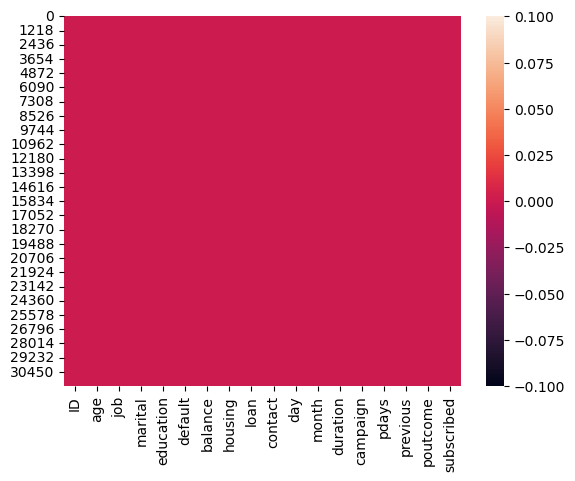

In [7]:
sns.heatmap(df.isnull())

In [8]:
df.columns.tolist()

['ID',
 'age',
 'job',
 'marital',
 'education',
 'default',
 'balance',
 'housing',
 'loan',
 'contact',
 'day',
 'month',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'poutcome',
 'subscribed']

In [9]:
df.nunique()

ID            31647
age              76
job              12
marital           3
education         4
default           2
balance        6326
housing           2
loan              2
contact           3
day              31
month            12
duration       1454
campaign         45
pdays           509
previous         38
poutcome          4
subscribed        2
dtype: int64

ID has all the 37647 values as unique values which do not add any value to the dataset. hence we will drop ID column.
Subscribed has only 2 unique values yes and no which makes it a classificatiob problem.


In [10]:
df.drop("ID",axis=1,inplace=True)
df

age         job   marital  education default  balance housing loan  \
0       56      admin.   married    unknown      no     1933      no   no   
1       31     unknown   married  secondary      no        3      no   no   
2       27    services   married  secondary      no      891     yes   no   
3       57  management  divorced   tertiary      no     3287      no   no   
4       31  technician   married  secondary      no      119     yes   no   
...    ...         ...       ...        ...     ...      ...     ...  ...   
31642   29  management    single   tertiary      no        0     yes   no   
31643   53  management  divorced   tertiary      no      380      no  yes   
31644   32  management    single   tertiary      no      312      no   no   
31645   57  technician   married  secondary      no      225     yes   no   
31646   55  management  divorced  secondary      no      204     yes   no   

         contact  day month  duration  campaign  pdays  previous poutcome  \
0      telephone   19   nov        44         2     -1         0  unknown   
1       cellular   20   jul        91         2     -1         0  unknown   
2       cellular   18   jul       240         1     -1         0  unknown   
3       cellular   22   jun       867         1     84         3  success   
4       cellular    4   feb       380         1     -1         0  unknown   
...          ...  ...   ...       ...       ...    ...       ...      ...   
31642   cellular   12   may       116         2     -1         0  unknown   
31643   cellular    5   jun       438         2     -1         0  unknown   
31644   cellular    7   aug        37         3     -1         0  unknown   
31645  telephone   15   may        22         7    337        12  failure   
31646   cellular   11   jul      1973         2     -1         0  unknown   

      subscribed  
0             no  
1             no  
2             no  
3            yes  
4             no  
...          ...  
31642         no  
31643        yes  
31644         no  
31645         no  
31646        yes  

[31647 rows x 17 columns]

In [11]:
df.duplicated().sum()

0

There is no duplicate data in the dataset

In [12]:
df.describe()

age        balance           day      duration      campaign  \
count  31647.000000   31647.000000  31647.000000  31647.000000  31647.000000   
mean      40.957247    1363.890258     15.835466    258.113534      2.765697   
std       10.625134    3028.304293      8.337097    257.118973      3.113830   
min       18.000000   -8019.000000      1.000000      0.000000      1.000000   
25%       33.000000      73.000000      8.000000    104.000000      1.000000   
50%       39.000000     450.000000     16.000000    180.000000      2.000000   
75%       48.000000    1431.000000     21.000000    318.500000      3.000000   
max       95.000000  102127.000000     31.000000   4918.000000     63.000000   

              pdays      previous  
count  31647.000000  31647.000000  
mean      39.576042      0.574272  
std       99.317592      2.422529  
min       -1.000000      0.000000  
25%       -1.000000      0.000000  
50%       -1.000000      0.000000  
75%       -1.000000      0.000000  
max      871.000000    275.000000

Here we can see that the count in each column is 31647 which indicates there is no null value. mean is greater than median in age, balance,duration,campaign,pdays,previous
median is greater than mean in day.
max value in balance, duration,pdays and previous is way higher than the 75th percentile which indicate sthe presence of outliers

In [13]:
#Separating numerical and catagorical columns:
#Checking for catagorical column:
categorical=[]
numerical=[]
for i in df.dtypes.index:
    if df.dtypes[i]=="object":
        categorical.append(i)
    else:
        numerical.append(i)
print("Categorical Columns :",categorical)
print("Numerical Columns :",numerical)
        

Categorical Columns : ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'subscribed']
Numerical Columns : ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']


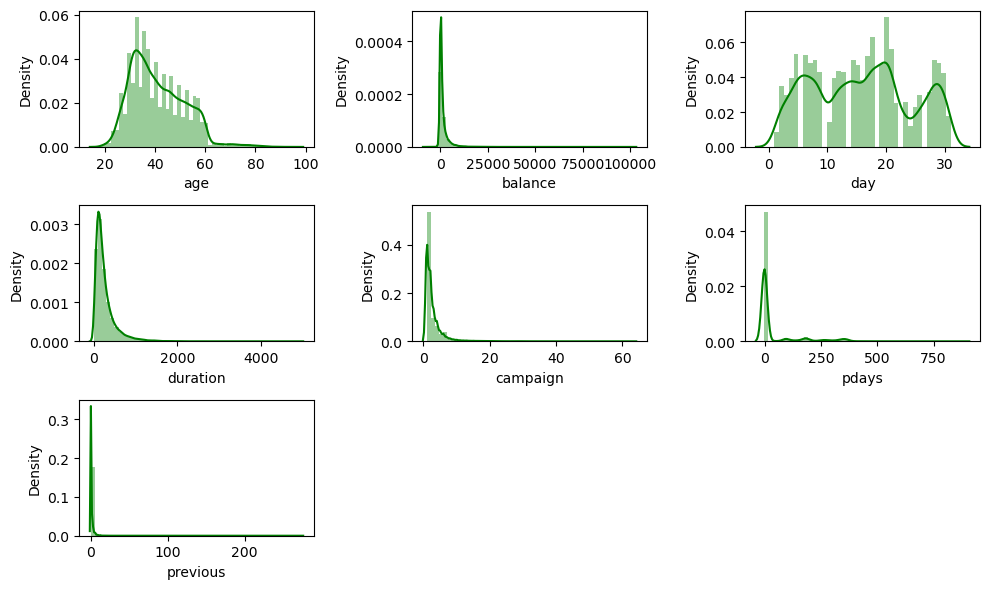

In [14]:
plt.figure(figsize=(10,6))
plotnumber=1
for col in numerical:
    if plotnumber<=7:
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(df[col],color='g')
    plotnumber+=1
plt.tight_layout()    

Above we can see the presence of right skewness in age, duration, previous,pday,campaign and balance. Day is little left skewed

job
blue-collar      6842
management       6639
technician       5307
admin.           3631
services         2903
retired          1574
self-employed    1123
entrepreneur     1008
unemployed        905
housemaid         874
student           635
unknown           206
dtype: int64

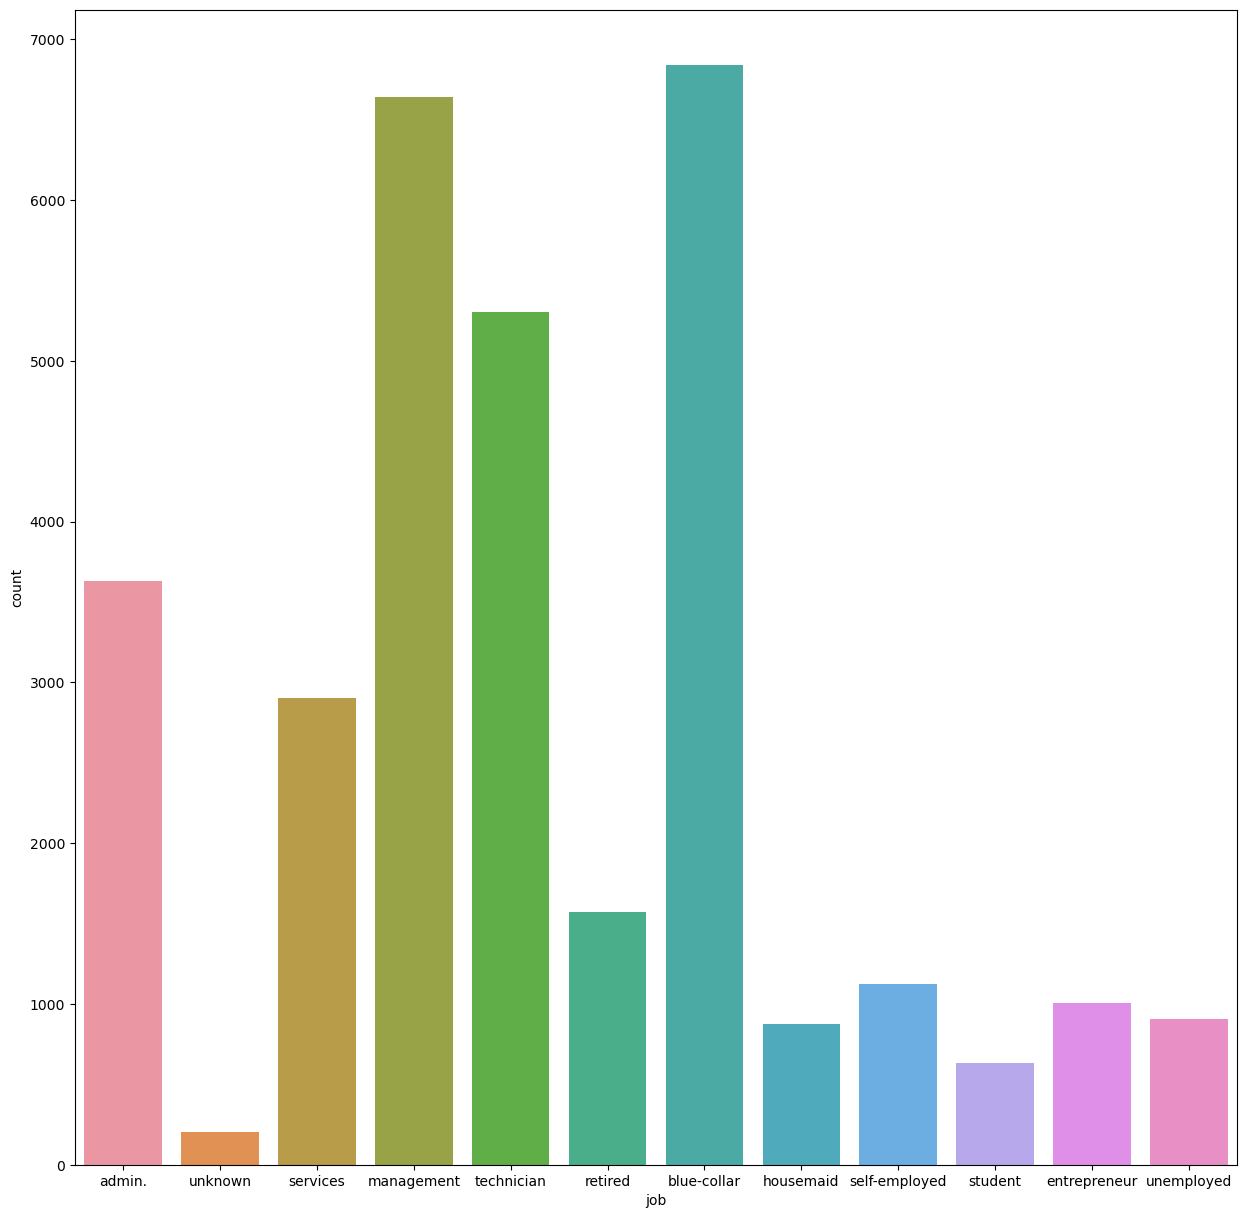

In [15]:
plt.figure(figsize=(15,15))
sns.countplot(x='job',data=df)
df.value_counts('job')

Above we can see that the highest number is of blue collared people in the database followed by management people

marital
married     19095
single       8922
divorced     3630
dtype: int64

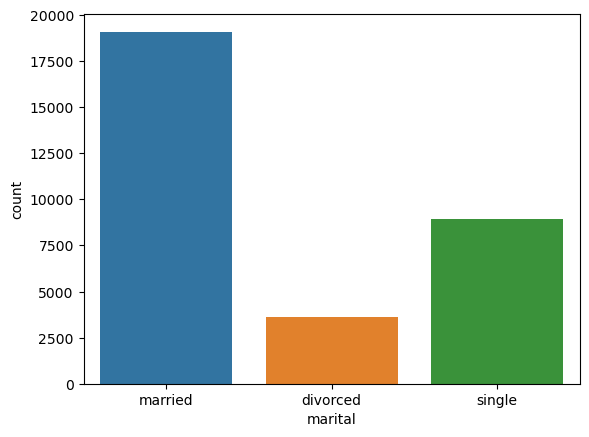

In [16]:
sns.countplot(x='marital',data=df)
df.value_counts('marital')

The dataset inclued maximum married people followed by unmarried people and least number are of divorcees

education
secondary    16224
tertiary      9301
primary       4808
unknown       1314
dtype: int64

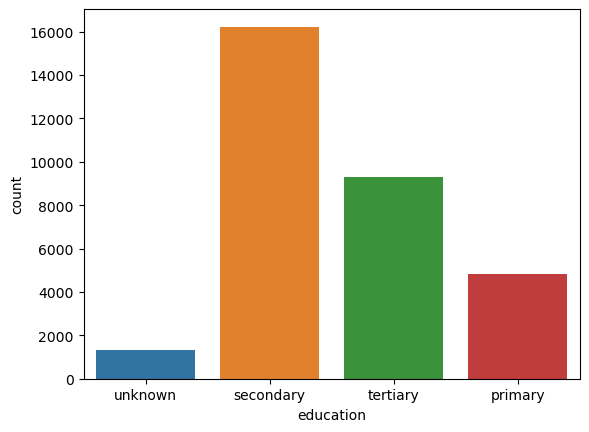

In [17]:
sns.countplot(x='education',data=df)
df.value_counts('education')

the dataset includes maximum number of people whi have atleast completed their secondary education.

default
no     31062
yes      585
dtype: int64

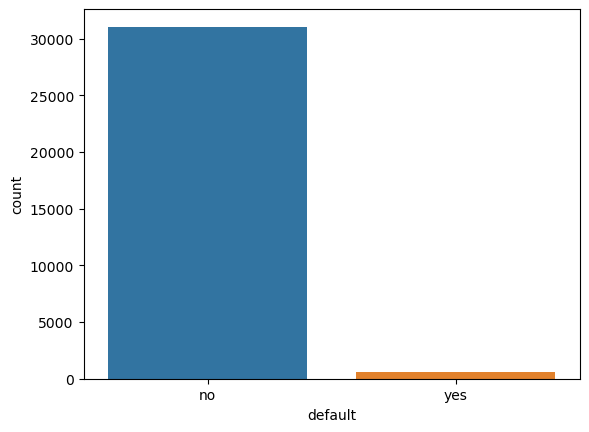

In [18]:
sns.countplot(x='default',data=df)
df.value_counts('default')

The dataset consists of meximum number of people who do not have credit default

housing
yes    17584
no     14063
dtype: int64

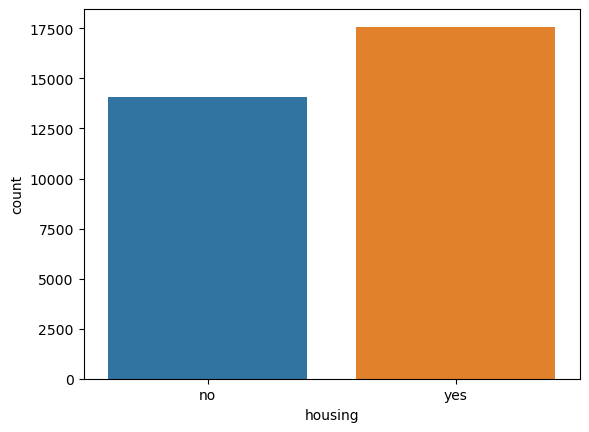

In [19]:
sns.countplot(x='housing',data=df)
df.value_counts('housing')

The dataset consists of more people who have taken housing loan than those who have not. Though the difference in the no. is not very large

loan
no     26516
yes     5131
dtype: int64

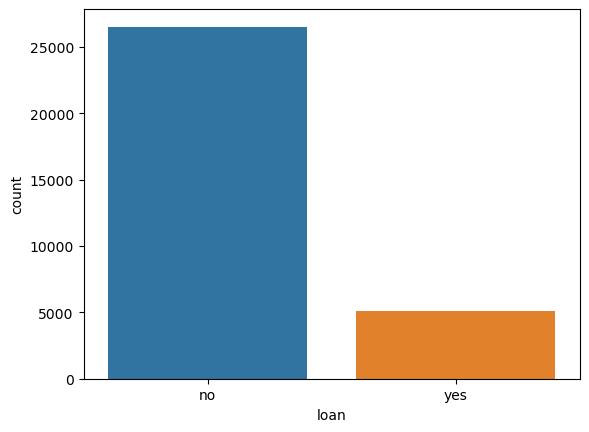

In [20]:
sns.countplot(x='loan',data=df)
df.value_counts('loan')

The dataset consists of majority of people who have not taken any kind of personal loan

contact
cellular     20423
unknown       9177
telephone     2047
dtype: int64

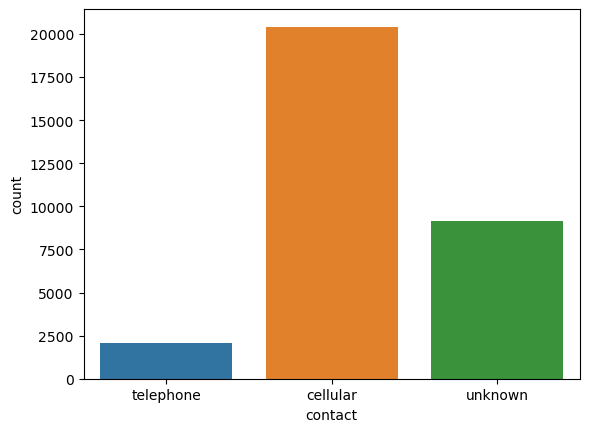

In [21]:
sns.countplot(x='contact',data=df)
df.value_counts('contact')

The dataset majorly consists of people who have cellphone as it gets easier to communicate with such people

day
20    1909
18    1612
21    1445
5     1373
6     1348
17    1344
14    1283
8     1281
28    1276
29    1241
7     1240
19    1228
15    1208
12    1116
13    1099
9     1097
30    1082
4     1016
11    1014
16     981
2      900
27     804
3      761
26     761
23     657
22     640
25     586
31     460
10     360
24     305
1      220
dtype: int64

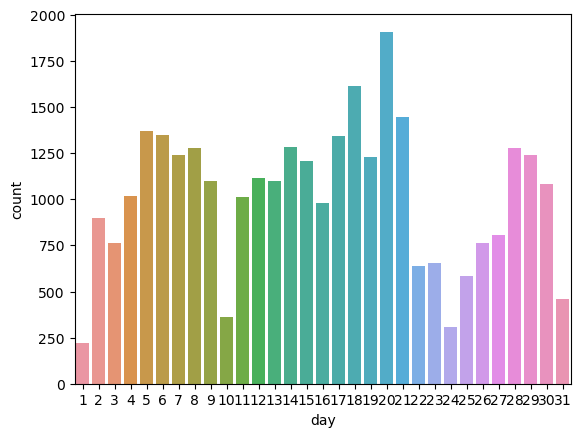

In [22]:
sns.countplot(x='day',data=df)
df.value_counts('day')

Here we can see that highest no. of contacts have happened on the 20th of the month. and the least number of contact has been made on the 1st of the month

month
may    9669
jul    4844
aug    4333
jun    3738
nov    2783
apr    2055
feb    1827
jan     977
oct     512
sep     410
mar     342
dec     157
dtype: int64

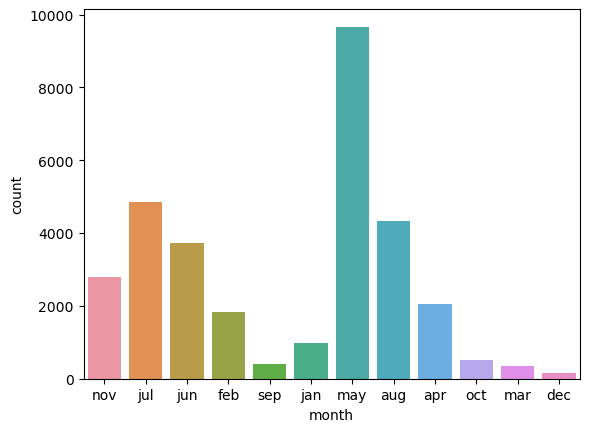

In [23]:
sns.countplot(x='month',data=df)
df.value_counts('month')

Above graph indicates that the max number of contacts have been made during the month of may followed by july, august and june. Least number of contact have been made in the month of December followe dby march and september

previous
0      25924
1       1921
2       1481
3        780
4        501
5        311
6        188
7        138
8         81
9         64
10        49
11        46
12        30
13        30
15        15
14        14
17        11
19         8
16         8
23         6
18         5
20         5
21         4
22         4
25         4
27         4
24         2
26         2
29         2
37         1
58         1
41         1
38         1
28         1
35         1
32         1
30         1
275        1
dtype: int64

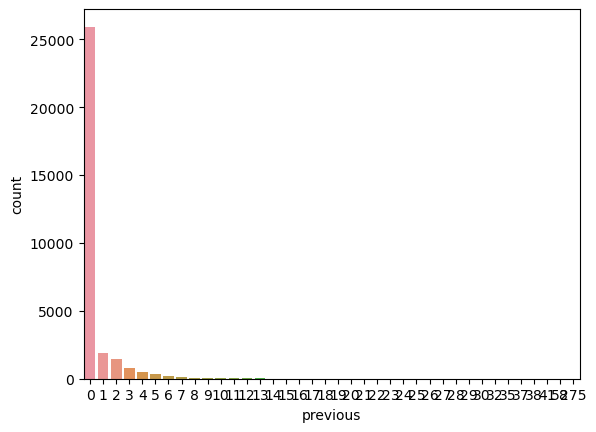

In [24]:
sns.countplot(x='previous',data=df)
df.value_counts('previous')

Above graph indicates that majority of people in the dataset have not been contacted before the campaign

poutcome
unknown    25929
failure     3362
other       1288
success     1068
dtype: int64

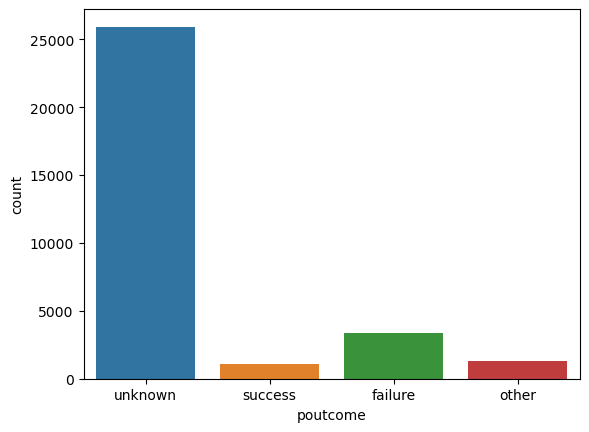

In [25]:
sns.countplot(x='poutcome',data=df)
df.value_counts('poutcome')

Above graph shows that the outcome of the previous campaign is majorly unknown.

subscribed
no     27932
yes     3715
dtype: int64

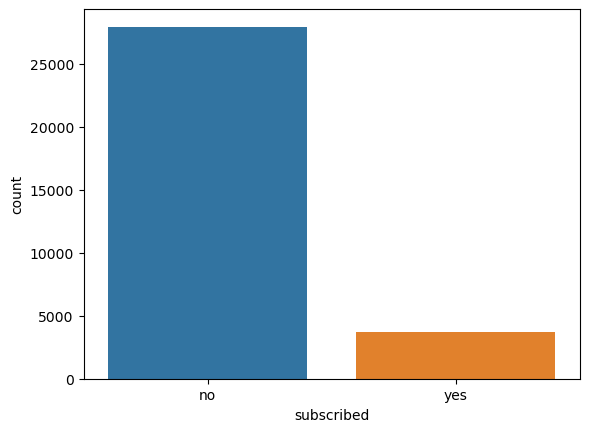

In [26]:
sns.countplot(x='subscribed',data=df)
df.value_counts('subscribed')

We can see abobe that majority of the people in dataset have not subscribed for the term deposit

age            Axes(0.125,0.653529;0.227941x0.226471)
balance     Axes(0.398529,0.653529;0.227941x0.226471)
day         Axes(0.672059,0.653529;0.227941x0.226471)
duration       Axes(0.125,0.381765;0.227941x0.226471)
campaign    Axes(0.398529,0.381765;0.227941x0.226471)
pdays       Axes(0.672059,0.381765;0.227941x0.226471)
previous           Axes(0.125,0.11;0.227941x0.226471)
dtype: object

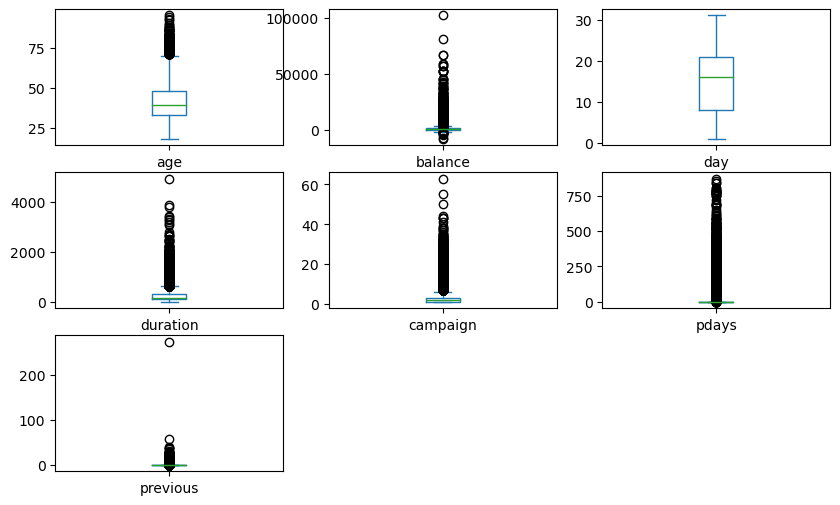

In [27]:
df.plot(kind='box',subplots=True,layout=(3,3),figsize=(10,6))

Above box plot shows the presence of outliers in all the numerical columns except day

<Axes: xlabel='subscribed', ylabel='age'>

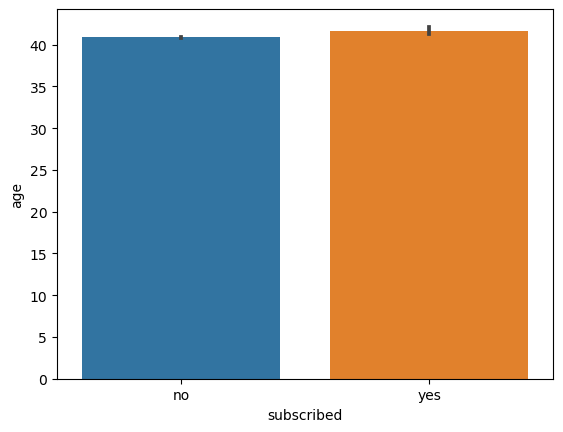

In [28]:
sns.barplot(y="age",x='subscribed',data=df)

Above barplot shows that almost same number of people have subscribed and not subscribed from all age group

<Axes: xlabel='subscribed', ylabel='duration'>

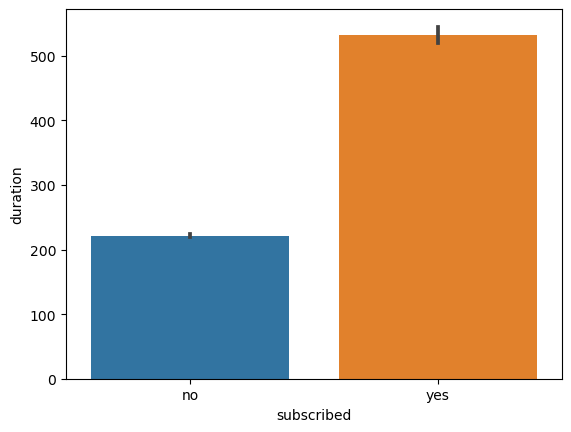

In [29]:
sns.barplot(y="duration",x="subscribed",data=df)

Above graph shows that if the call duration was higher the chances of subscrption is more

<Axes: xlabel='subscribed', ylabel='campaign'>

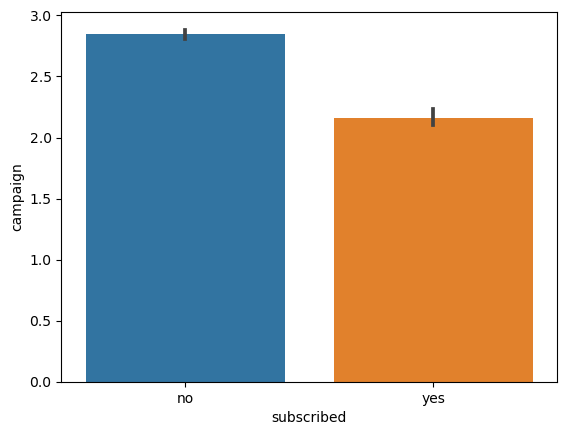

In [30]:
sns.barplot(y="campaign",x="subscribed",data=df)

This shows that the more people were contacted, the lesser were the chance of their subscription

<Axes: xlabel='subscribed', ylabel='pdays'>

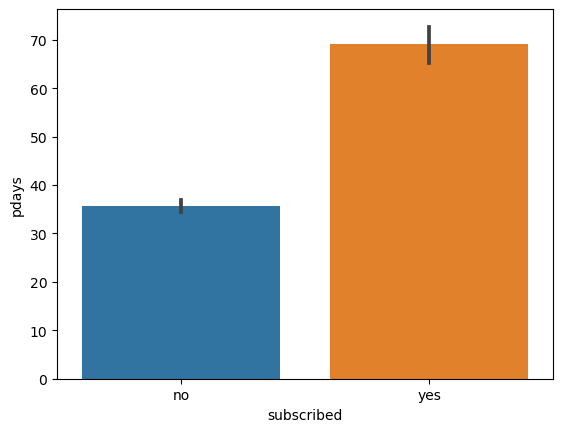

In [31]:
sns.barplot(y="pdays",x="subscribed",data=df)

this shows that the subscrption was higher when there was more gap between contacting the same person for the subscription

<Axes: xlabel='subscribed', ylabel='previous'>

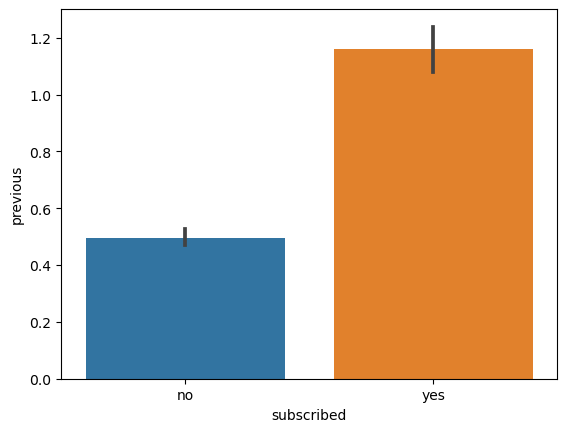

In [32]:
sns.barplot(y="previous",x="subscribed",data=df)

this shows that people who have been contacted earlier have subscribed more

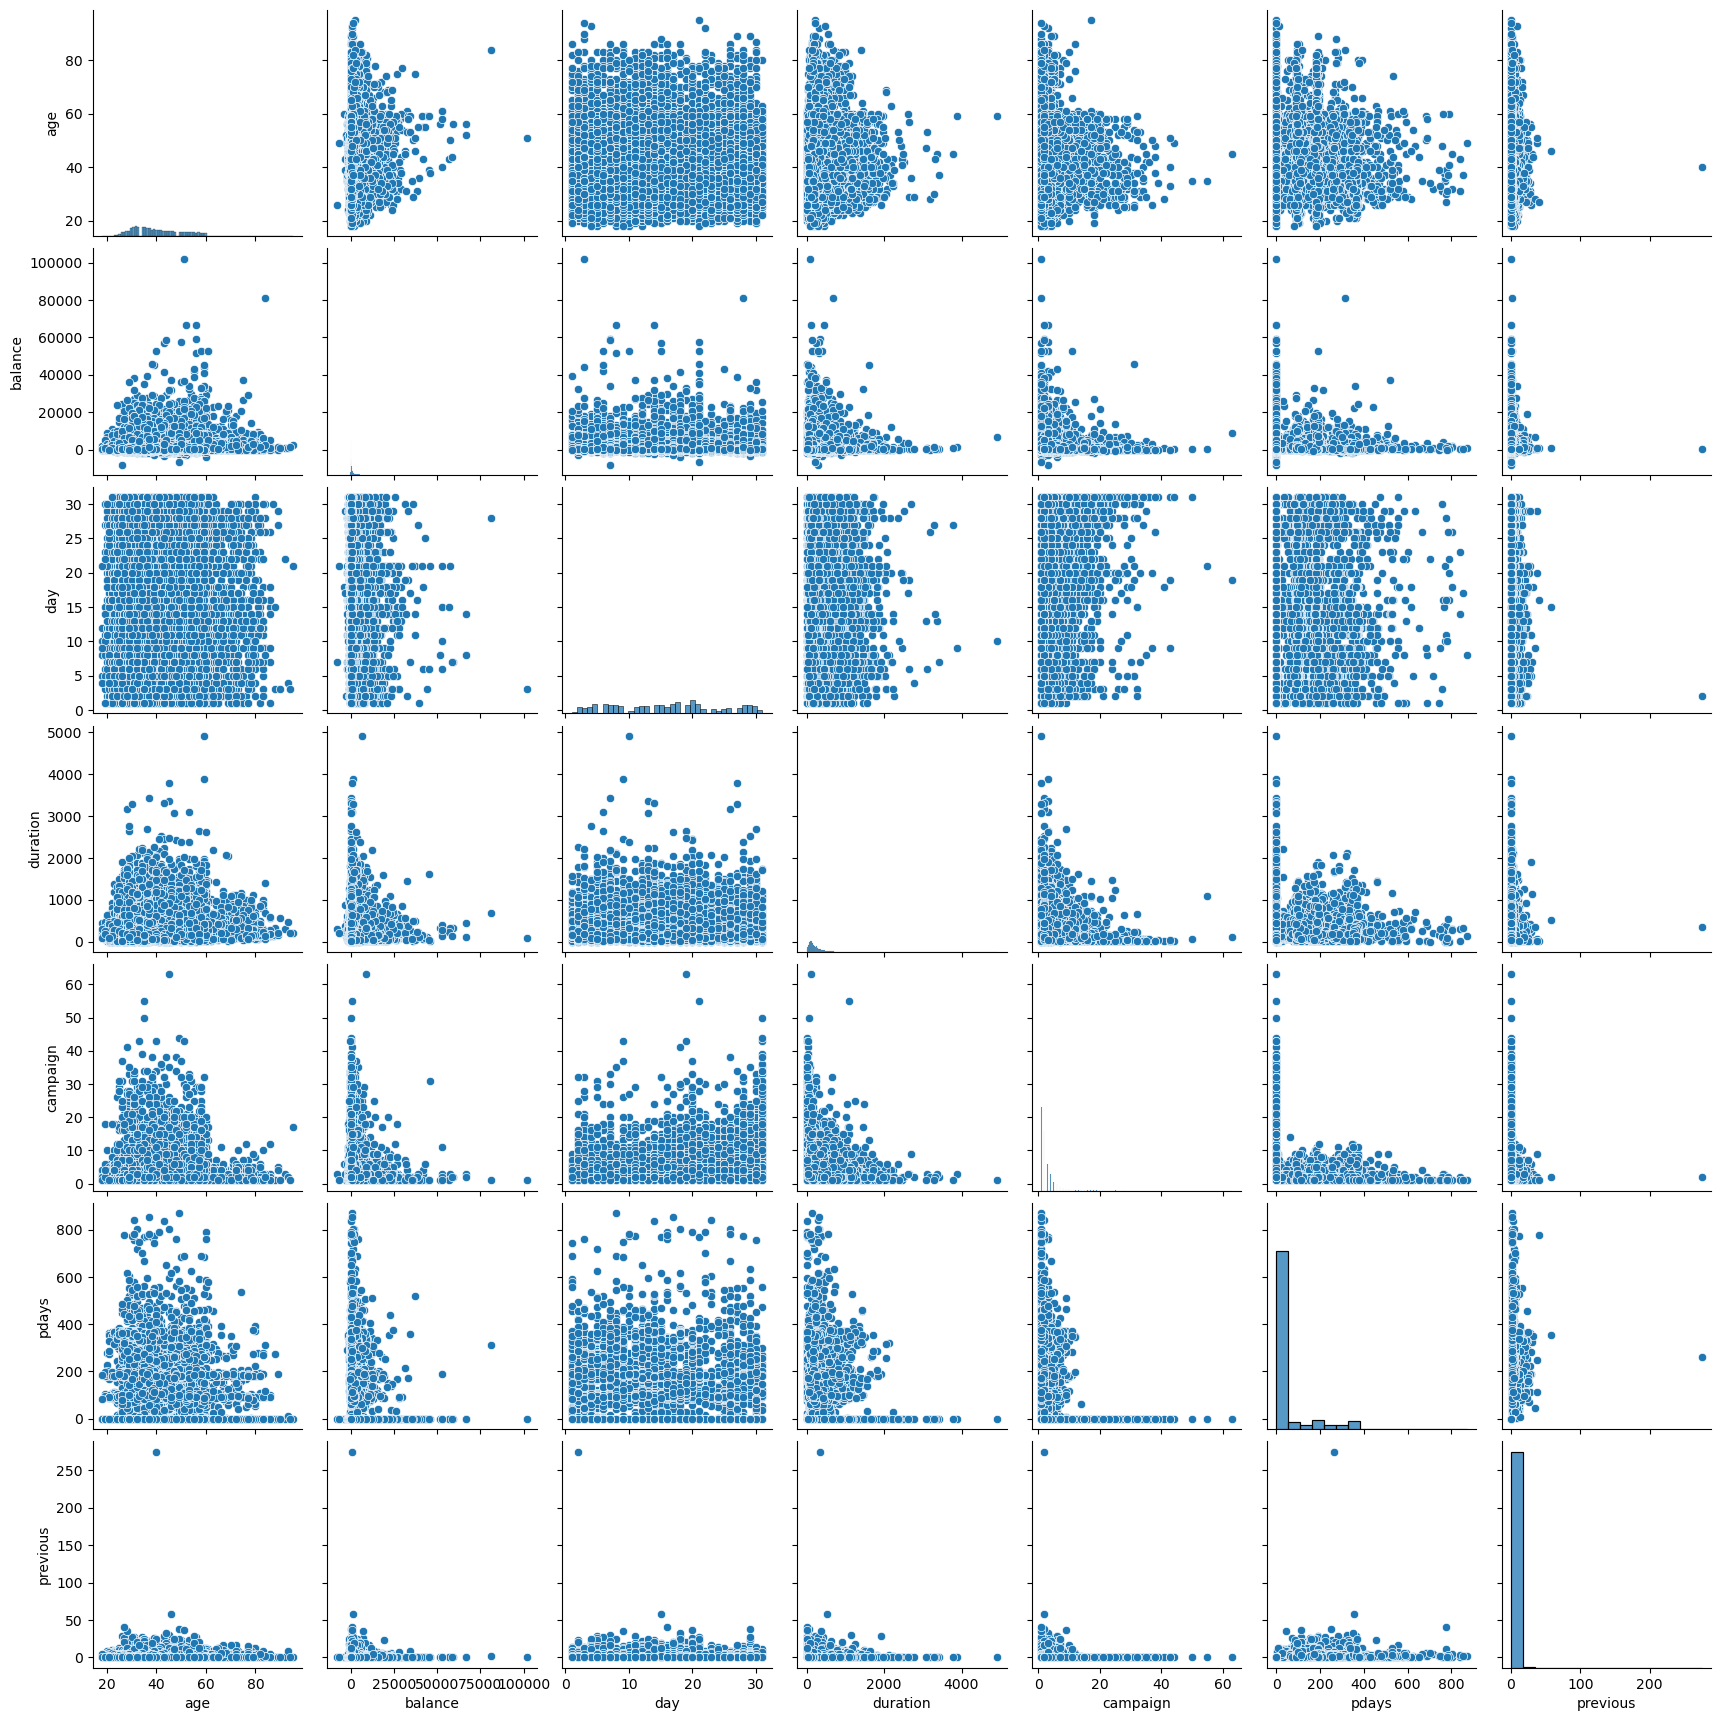

In [33]:
sns.pairplot(df)

Above pair plot shows correlation between all the numerical columns

<Axes: xlabel='previous', ylabel='duration'>

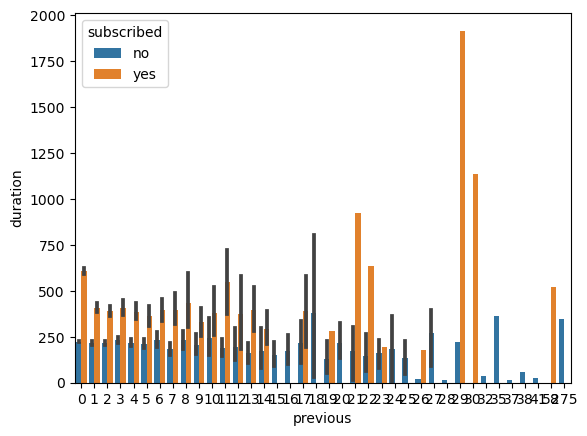

In [34]:
sns.barplot(x="previous",y="duration",hue="subscribed",data=df)

Abve graph shows that those who have been contacted earlier and where call duration is high have high chances of subscription

<Axes: xlabel='subscribed', ylabel='age'>

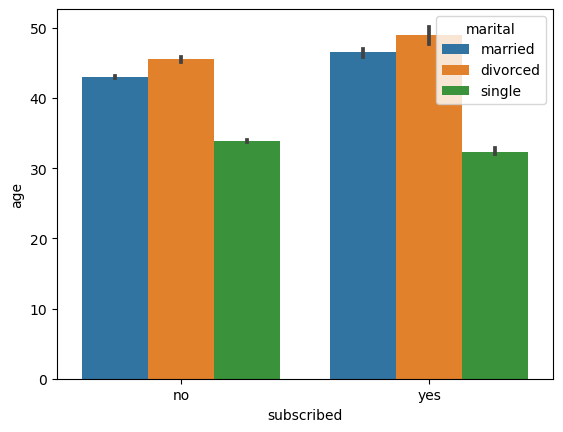

In [35]:
sns.barplot(x="subscribed",y="age",hue="marital",data=df)

Here we can see that the highest number is of divircees in each column who have subscribed and are of age range aroung 50

In [36]:
dfcor=df.corr()
dfcor

age   balance       day  duration  campaign     pdays  previous
age       1.000000  0.103245 -0.011056 -0.003870  0.005733 -0.021947  0.005761
balance   0.103245  1.000000  0.003461  0.024274 -0.012032  0.001789  0.013843
day      -0.011056  0.003461  1.000000 -0.032288  0.159168 -0.087626 -0.048752
duration -0.003870  0.024274 -0.032288  1.000000 -0.080305  0.000529  0.001783
campaign  0.005733 -0.012032  0.159168 -0.080305  1.000000 -0.087570 -0.033151
pdays    -0.021947  0.001789 -0.087626  0.000529 -0.087570  1.000000  0.428938
previous  0.005761  0.013843 -0.048752  0.001783 -0.033151  0.428938  1.000000

<Axes: >

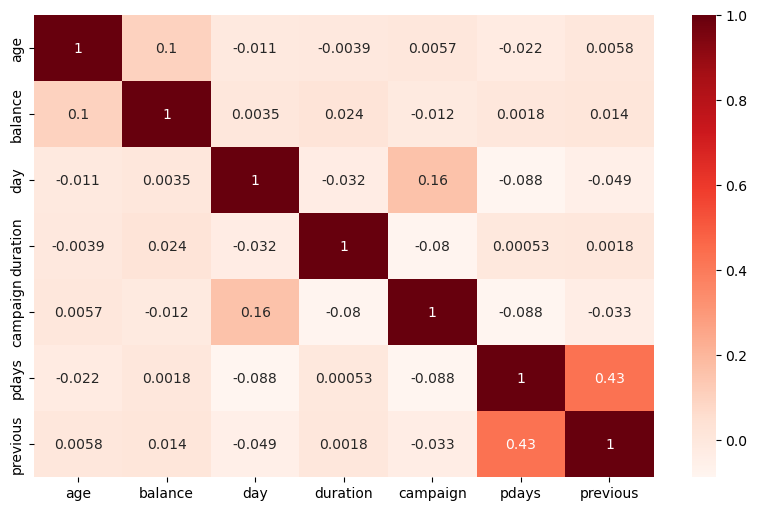

In [37]:
plt.figure(figsize=(10,6))
sns.heatmap(dfcor,annot=True,cmap='Reds')

Above heatmap shows the correlation between various columns.
1.) pdays and previous are positively correlated with each other
2.)Others are not very much positively or negatively correlated to each other

In [38]:
#Now lets remove outliers
from scipy.stats import zscore

In [39]:
z=np.abs(zscore(df[['age','balance','duration','campaign','pdays','previous']]))
z

age   balance  duration  campaign     pdays  previous
0      1.415793  0.187933  0.832754  0.245906  0.408555  0.237059
1      0.937156  0.449397  0.649957  0.245906  0.408555  0.237059
2      1.313627  0.156159  0.070449  0.567059  0.408555  0.237059
3      1.509911  0.635055  2.368149  0.567059  0.447299  1.001336
4      0.937156  0.411091  0.474054  0.567059  0.408555  0.237059
...         ...       ...       ...       ...       ...       ...
31642  1.125392  0.450388  0.552724  0.245906  0.408555  0.237059
31643  1.133439  0.324903  0.699635  0.245906  0.408555  0.237059
31644  0.843038  0.347358  0.859979  0.075247  0.408555  0.237059
31645  1.509911  0.376088  0.918319  1.359859  2.994723  4.716521
31646  1.321675  0.383022  6.669728  0.245906  0.408555  0.237059

[31647 rows x 6 columns]

In [40]:
np.where(z>3)

(array([   21,    26,    36, ..., 31622, 31645, 31646], dtype=int64),
 array([3, 1, 4, ..., 4, 5, 2], dtype=int64))

In [41]:
df1=df[(z<3).all(axis=1)]
df1

age         job   marital  education default  balance housing loan  \
0       56      admin.   married    unknown      no     1933      no   no   
1       31     unknown   married  secondary      no        3      no   no   
2       27    services   married  secondary      no      891     yes   no   
3       57  management  divorced   tertiary      no     3287      no   no   
4       31  technician   married  secondary      no      119     yes   no   
...    ...         ...       ...        ...     ...      ...     ...  ...   
31640   43  management    single  secondary      no     2968      no   no   
31641   37  technician    single   tertiary      no     1309      no   no   
31642   29  management    single   tertiary      no        0     yes   no   
31643   53  management  divorced   tertiary      no      380      no  yes   
31644   32  management    single   tertiary      no      312      no   no   

         contact  day month  duration  campaign  pdays  previous poutcome  \
0      telephone   19   nov        44         2     -1         0  unknown   
1       cellular   20   jul        91         2     -1         0  unknown   
2       cellular   18   jul       240         1     -1         0  unknown   
3       cellular   22   jun       867         1     84         3  success   
4       cellular    4   feb       380         1     -1         0  unknown   
...          ...  ...   ...       ...       ...    ...       ...      ...   
31640    unknown   20   jun        30         4     -1         0  unknown   
31641    unknown    6   jun       442         2     -1         0  unknown   
31642   cellular   12   may       116         2     -1         0  unknown   
31643   cellular    5   jun       438         2     -1         0  unknown   
31644   cellular    7   aug        37         3     -1         0  unknown   

      subscribed  
0             no  
1             no  
2             no  
3            yes  
4             no  
...          ...  
31640         no  
31641         no  
31642         no  
31643        yes  
31644         no  

[28124 rows x 17 columns]

In [42]:
print("data_loss% =",((df.shape[0]-df1.shape[0])/df.shape[0])*100)

data_loss% = 11.132176825607482


Data loss is 11% which is high still lets proceed with df1

In [43]:
df1.skew()

age         0.438496
balance     2.437605
day         0.073752
duration    1.596552
campaign    2.059359
pdays       2.824483
previous    3.691573
dtype: float64

In [44]:
from scipy.stats import boxcox

In [45]:
df1['balance']=np.cbrt(df1['balance'])

In [46]:
df1['duration']=np.cbrt(df1['duration'])

In [47]:
df1['campaign']=np.cbrt(df1['campaign'])

In [48]:
#df1['pdays']=np.cbrt(df1['pdays'])

In [49]:
#df1['pdays']=boxcox(df1['pdays'],.5)

In [50]:
#df1['previous']=np.cbrt(df1['previous'])

In [51]:
df1['previous']=np.cbrt(df1['previous'])

In [52]:
df1['previous']=np.cbrt(df1['previous'])

In [53]:
df1.skew()

age         0.438496
balance    -0.435065
day         0.073752
duration    0.310493
campaign    0.997328
pdays       2.824483
previous    2.103894
dtype: float64

In [54]:
#Now we will Encode the categorical data
from sklearn.preprocessing import OrdinalEncoder
OE=OrdinalEncoder()
for i in df1.columns:
    if df1[i].dtype=='object':
        df1[i]=OE.fit_transform(df1[i].values.reshape(-1,1))

df1

age   job  marital  education  default    balance  housing  loan  \
0       56   0.0      1.0        3.0      0.0  12.456918      0.0   0.0   
1       31  11.0      1.0        1.0      0.0   1.442250      0.0   0.0   
2       27   7.0      1.0        1.0      0.0   9.622603      1.0   0.0   
3       57   4.0      0.0        2.0      0.0  14.868480      0.0   0.0   
4       31   9.0      1.0        1.0      0.0   4.918685      1.0   0.0   
...    ...   ...      ...        ...      ...        ...      ...   ...   
31640   43   4.0      2.0        1.0      0.0  14.371032      0.0   0.0   
31641   37   9.0      2.0        2.0      0.0  10.939057      0.0   0.0   
31642   29   4.0      2.0        2.0      0.0   0.000000      1.0   0.0   
31643   53   4.0      0.0        2.0      0.0   7.243156      0.0   1.0   
31644   32   4.0      2.0        2.0      0.0   6.782423      0.0   0.0   

       contact  day  month  duration  campaign  pdays  previous  poutcome  \
0          1.0   19    9.0  3.530348  1.259921     -1  0.000000       3.0   
1          0.0   20    5.0  4.497941  1.259921     -1  0.000000       3.0   
2          0.0   18    5.0  6.214465  1.000000     -1  0.000000       3.0   
3          0.0   22    6.0  9.535417  1.000000     84  1.129831       2.0   
4          0.0    4    3.0  7.243156  1.000000     -1  0.000000       3.0   
...        ...  ...    ...       ...       ...    ...       ...       ...   
31640      2.0   20    6.0  3.107233  1.587401     -1  0.000000       3.0   
31641      2.0    6    6.0  7.617412  1.259921     -1  0.000000       3.0   
31642      0.0   12    8.0  4.876999  1.259921     -1  0.000000       3.0   
31643      0.0    5    6.0  7.594363  1.259921     -1  0.000000       3.0   
31644      0.0    7    1.0  3.332222  1.442250     -1  0.000000       3.0   

       subscribed  
0             0.0  
1             0.0  
2             0.0  
3             1.0  
4             0.0  
...           ...  
31640         0.0  
31641         0.0  
31642         0.0  
31643         1.0  
31644         0.0  

[28124 rows x 17 columns]

In [55]:
dfcorr=df1.corr()
dfcorr

age       job   marital  education   default   balance  \
age         1.000000 -0.030552 -0.411087  -0.100363 -0.009616  0.079543   
job        -0.030552  1.000000  0.067076   0.169526 -0.007400  0.026094   
marital    -0.411087  0.067076  1.000000   0.109940 -0.012221  0.034716   
education  -0.100363  0.169526  0.109940   1.000000 -0.007467  0.064140   
default    -0.009616 -0.007400 -0.012221  -0.007467  1.000000 -0.209161   
balance     0.079543  0.026094  0.034716   0.064140 -0.209161  1.000000   
housing    -0.155557 -0.122764 -0.026593  -0.096581 -0.014763 -0.070652   
loan        0.005488 -0.038629 -0.045159  -0.047982  0.081270 -0.140556   
contact     0.029036 -0.084375 -0.042070  -0.121975  0.014592 -0.055374   
day        -0.009937  0.020514 -0.008386   0.017677  0.007138 -0.013262   
month      -0.042070 -0.088359 -0.003321  -0.056416  0.007290 -0.004558   
duration   -0.031297 -0.003418  0.016357   0.002066 -0.000054  0.024577   
campaign    0.040856  0.007853 -0.030809  -0.009684  0.012757 -0.023629   
pdays      -0.010143  0.001769  0.013587   0.026682 -0.033086  0.068415   
previous   -0.000965  0.016979  0.025100   0.057087 -0.040929  0.096577   
poutcome    0.000751 -0.011441 -0.015021  -0.041203  0.035944 -0.082925   
subscribed -0.007172  0.036743  0.056387   0.075838 -0.014500  0.094746   

             housing      loan   contact       day     month  duration  \
age        -0.155557  0.005488  0.029036 -0.009937 -0.042070 -0.031297   
job        -0.122764 -0.038629 -0.084375  0.020514 -0.088359 -0.003418   
marital    -0.026593 -0.045159 -0.042070 -0.008386 -0.003321  0.016357   
education  -0.096581 -0.047982 -0.121975  0.017677 -0.056416  0.002066   
default    -0.014763  0.081270  0.014592  0.007138  0.007290 -0.000054   
balance    -0.070652 -0.140556 -0.055374 -0.013262 -0.004558  0.024577   
housing     1.000000  0.031251  0.215776 -0.015138  0.274293  0.011891   
loan        0.031251  1.000000 -0.012620  0.011949  0.026898 -0.006263   
contact     0.215776 -0.012620  1.000000 -0.030543  0.392662 -0.034850   
day        -0.015138  0.011949 -0.030543  1.000000  0.017204 -0.039272   
month       0.274293  0.026898  0.392662  0.017204  1.000000  0.003313   
duration    0.011891 -0.006263 -0.034850 -0.039272  0.003313  1.000000   
campaign   -0.043774 -0.001319 -0.001789  0.132730 -0.132335 -0.103925   
pdays       0.072618 -0.007713 -0.239045 -0.056337 -0.055621  0.021846   
previous    0.012634 -0.018143 -0.263560 -0.049699 -0.019173  0.026690   
poutcome   -0.049579  0.001714  0.248117  0.045799  0.022734 -0.006820   
subscribed -0.145640 -0.074803 -0.158031 -0.030122 -0.022564  0.328075   

            campaign     pdays  previous  poutcome  subscribed  
age         0.040856 -0.010143 -0.000965  0.000751   -0.007172  
job         0.007853  0.001769  0.016979 -0.011441    0.036743  
marital    -0.030809  0.013587  0.025100 -0.015021    0.056387  
education  -0.009684  0.026682  0.057087 -0.041203    0.075838  
default     0.012757 -0.033086 -0.040929  0.035944   -0.014500  
balance    -0.023629  0.068415  0.096577 -0.082925    0.094746  
housing    -0.043774  0.072618  0.012634 -0.049579   -0.145640  
loan       -0.001319 -0.007713 -0.018143  0.001714   -0.074803  
contact    -0.001789 -0.239045 -0.263560  0.248117   -0.158031  
day         0.132730 -0.056337 -0.049699  0.045799   -0.030122  
month      -0.132335 -0.055621 -0.019173  0.022734   -0.022564  
duration   -0.103925  0.021846  0.026690 -0.006820    0.328075  
campaign    1.000000 -0.090000 -0.107069  0.102371   -0.081699  
pdays      -0.090000  1.000000  0.893267 -0.881013    0.116641  
previous   -0.107069  0.893267  1.000000 -0.933395    0.188296  
poutcome    0.102371 -0.881013 -0.933395  1.000000   -0.091071  
subscribed -0.081699  0.116641  0.188296 -0.091071    1.000000

<Axes: >

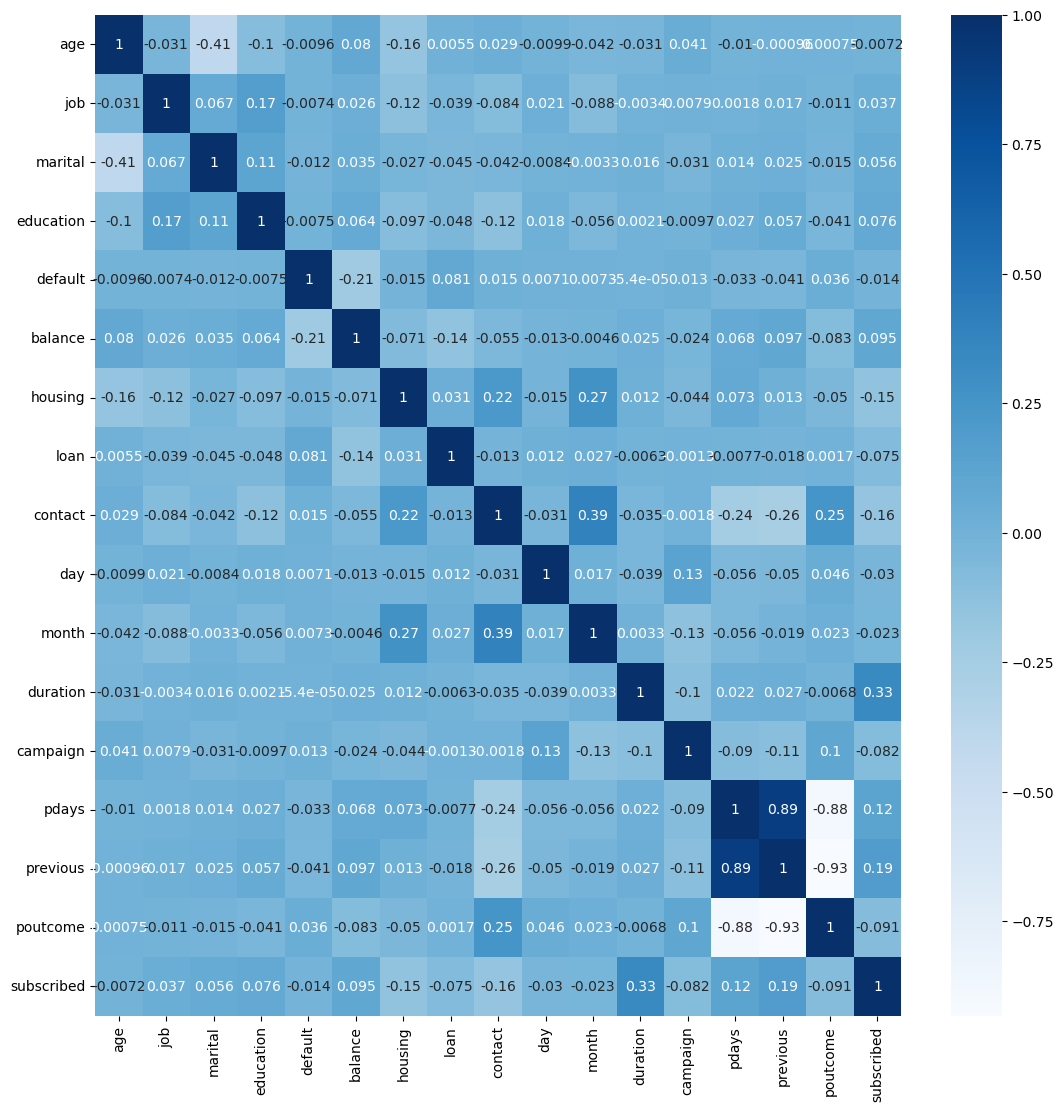

In [56]:
plt.figure(figsize=(13,13))
sns.heatmap(dfcorr,annot=True,cmap="Blues")

Here we can see that duration is positively correlated with subscribed

In [57]:
df1.dtypes

age             int64
job           float64
marital       float64
education     float64
default       float64
balance       float64
housing       float64
loan          float64
contact       float64
day             int64
month         float64
duration      float64
campaign      float64
pdays           int64
previous      float64
poutcome      float64
subscribed    float64
dtype: object

In [58]:
#Now lets remove the skewness

In [59]:
dfcorr['subscribed'].sort_values(ascending=False)

subscribed    1.000000
duration      0.328075
previous      0.188296
pdays         0.116641
balance       0.094746
education     0.075838
marital       0.056387
job           0.036743
age          -0.007172
default      -0.014500
month        -0.022564
day          -0.030122
loan         -0.074803
campaign     -0.081699
poutcome     -0.091071
housing      -0.145640
contact      -0.158031
Name: subscribed, dtype: float64

In [60]:
#spliting the variables
x=df1.drop('subscribed',axis=1)
y=df1['subscribed']

In [61]:
x.shape

(28124, 16)

In [62]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
#df
x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
x

age       job   marital  education   default   balance   housing  \
0      1.522811 -1.321707 -0.276906   2.376931 -0.139916  0.857969 -1.106956   
1     -0.957368  2.023504 -0.276906  -0.301360 -0.139916 -0.920001 -1.106956   
2     -1.354197  0.807064 -0.276906  -0.301360 -0.139916  0.400458  0.903378   
3      1.622018 -0.105266 -1.927894   1.037785 -0.139916  1.247239 -1.106956   
4     -0.957368  1.415284 -0.276906  -0.301360 -0.139916 -0.358840  0.903378   
...         ...       ...       ...        ...       ...       ...       ...   
28119  0.233118 -0.105266  1.374081  -0.301360 -0.139916  1.166942 -1.106956   
28120 -0.362125  1.415284  1.374081   1.037785 -0.139916  0.612958 -1.106956   
28121 -1.155782 -0.105266  1.374081   1.037785 -0.139916 -1.152806  0.903378   
28122  1.225189 -0.105266 -1.927894   1.037785 -0.139916  0.016372 -1.106956   
28123 -0.858161 -0.105266  1.374081   1.037785 -0.139916 -0.057999 -1.106956   

           loan   contact       day     month  duration  campaign     pdays  \
0     -0.447423  0.359876  0.374734  1.175534 -1.435964 -0.066617 -0.361901   
1     -0.447423 -0.735486  0.493893 -0.164394 -0.816377 -0.066617 -0.361901   
2     -0.447423 -0.735486  0.255575 -0.164394  0.282780 -0.946471 -0.361901   
3     -0.447423 -0.735486  0.732212  0.170588  2.409314 -0.946471  0.846358   
4     -0.447423 -0.735486 -1.412653 -0.834358  0.941491 -0.946471 -0.361901   
...         ...       ...       ...       ...       ...       ...       ...   
28119 -0.447423  1.455237  0.493893  0.170588 -1.706902  1.041930 -0.361901   
28120 -0.447423  1.455237 -1.174334  0.170588  1.181141 -0.066617 -0.361901   
28121 -0.447423 -0.735486 -0.459380  0.840552 -0.573652 -0.066617 -0.361901   
28122  2.235019 -0.735486 -1.293493  0.170588  1.166382 -0.066617 -0.361901   
28123 -0.447423 -0.735486 -1.055175 -1.504322 -1.562832  0.550580 -0.361901   

       previous  poutcome  
0     -0.401733  0.377632  
1     -0.401733  0.377632  
2     -0.401733  0.377632  
3      2.594007 -0.766204  
4     -0.401733  0.377632  
...         ...       ...  
28119 -0.401733  0.377632  
28120 -0.401733  0.377632  
28121 -0.401733  0.377632  
28122 -0.401733  0.377632  
28123 -0.401733  0.377632  

[28124 rows x 16 columns]

In [63]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [64]:
vif=pd.DataFrame()
vif['Features']=x.columns
vif['Values']=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif

Features    Values
0         age  1.271543
1         job  1.049426
2     marital  1.230147
3   education  1.068281
4     default  1.050660
5     balance  1.092191
6     housing  1.195247
7        loan  1.030886
8     contact  1.330417
9         day  1.026724
10      month  1.294963
11   duration  1.017345
12   campaign  1.061632
13      pdays  5.581588
14   previous  9.801229
15   poutcome  8.580698

Here we can see multicolinearity between previous and poutcome. So we will remove poutcome

In [65]:
x.drop('poutcome',axis=1,inplace=True)
x

age       job   marital  education   default   balance   housing  \
0      1.522811 -1.321707 -0.276906   2.376931 -0.139916  0.857969 -1.106956   
1     -0.957368  2.023504 -0.276906  -0.301360 -0.139916 -0.920001 -1.106956   
2     -1.354197  0.807064 -0.276906  -0.301360 -0.139916  0.400458  0.903378   
3      1.622018 -0.105266 -1.927894   1.037785 -0.139916  1.247239 -1.106956   
4     -0.957368  1.415284 -0.276906  -0.301360 -0.139916 -0.358840  0.903378   
...         ...       ...       ...        ...       ...       ...       ...   
28119  0.233118 -0.105266  1.374081  -0.301360 -0.139916  1.166942 -1.106956   
28120 -0.362125  1.415284  1.374081   1.037785 -0.139916  0.612958 -1.106956   
28121 -1.155782 -0.105266  1.374081   1.037785 -0.139916 -1.152806  0.903378   
28122  1.225189 -0.105266 -1.927894   1.037785 -0.139916  0.016372 -1.106956   
28123 -0.858161 -0.105266  1.374081   1.037785 -0.139916 -0.057999 -1.106956   

           loan   contact       day     month  duration  campaign     pdays  \
0     -0.447423  0.359876  0.374734  1.175534 -1.435964 -0.066617 -0.361901   
1     -0.447423 -0.735486  0.493893 -0.164394 -0.816377 -0.066617 -0.361901   
2     -0.447423 -0.735486  0.255575 -0.164394  0.282780 -0.946471 -0.361901   
3     -0.447423 -0.735486  0.732212  0.170588  2.409314 -0.946471  0.846358   
4     -0.447423 -0.735486 -1.412653 -0.834358  0.941491 -0.946471 -0.361901   
...         ...       ...       ...       ...       ...       ...       ...   
28119 -0.447423  1.455237  0.493893  0.170588 -1.706902  1.041930 -0.361901   
28120 -0.447423  1.455237 -1.174334  0.170588  1.181141 -0.066617 -0.361901   
28121 -0.447423 -0.735486 -0.459380  0.840552 -0.573652 -0.066617 -0.361901   
28122  2.235019 -0.735486 -1.293493  0.170588  1.166382 -0.066617 -0.361901   
28123 -0.447423 -0.735486 -1.055175 -1.504322 -1.562832  0.550580 -0.361901   

       previous  
0     -0.401733  
1     -0.401733  
2     -0.401733  
3      2.594007  
4     -0.401733  
...         ...  
28119 -0.401733  
28120 -0.401733  
28121 -0.401733  
28122 -0.401733  
28123 -0.401733  

[28124 rows x 15 columns]

In [66]:
#Again we will check vif
vif=pd.DataFrame()
vif['Features']=x.columns
vif['Values']=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif

Features    Values
0         age  1.271375
1         job  1.049372
2     marital  1.230059
3   education  1.068132
4     default  1.050650
5     balance  1.092188
6     housing  1.189320
7        loan  1.029661
8     contact  1.329876
9         day  1.026632
10      month  1.294951
11   duration  1.014451
12   campaign  1.061363
13      pdays  5.147691
14   previous  5.220890

OVERSAMPLING

In [67]:
from imblearn.over_sampling import SMOTE

In [68]:
SM=SMOTE()
x1,y1=SM.fit_resample(x,y)

In [69]:
#checking value count again
y1.value_counts()

0.0    25264
1.0    25264
Name: subscribed, dtype: int64

MODEL BUILDING

In [70]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier,AdaBoostClassifier,BaggingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB

In [71]:
#finding best random state in dfn
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=.30,random_state=i)
    RFR=RandomForestClassifier()
    RFR.fit(x_train,y_train)
    pred=RFR.predict(x_test)
    accu=accuracy_score(y_test,pred)
    if accu>maxAccu:
        maxAccu=accu
        maxRS=i
print("Best Accuracy is",maxAccu,"at random state", maxRS)

Best Accuracy is 0.9563295731908438 at random state 96


Creating train_test_split

In [72]:
x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=0.30,random_state=maxRS)

RANDOM FOREST CLASSIFIER

In [73]:
RFC=RandomForestClassifier()
RFC.fit(x_train,y_train)
predRFC=RFC.predict(x_test)
predRFC
print(accuracy_score(y_test,predRFC))
print(confusion_matrix(y_test,predRFC))
print(classification_report(y_test,predRFC))

0.956527475427139
[[7089  477]
 [ 182 7411]]
              precision    recall  f1-score   support

         0.0       0.97      0.94      0.96      7566
         1.0       0.94      0.98      0.96      7593

    accuracy                           0.96     15159
   macro avg       0.96      0.96      0.96     15159
weighted avg       0.96      0.96      0.96     15159



OBS: The accuracy score using Random Forest Classifier is 95.65%

LOGISTIC REGRESSION

In [74]:
LR=LogisticRegression()
LR.fit(x_train,y_train)
predLR=LR.predict(x_test)
predLR
print(accuracy_score(y_test,predLR))
print(confusion_matrix(y_test,predLR))
print(classification_report(y_test,predLR))

0.82300943333993
[[6099 1467]
 [1216 6377]]
              precision    recall  f1-score   support

         0.0       0.83      0.81      0.82      7566
         1.0       0.81      0.84      0.83      7593

    accuracy                           0.82     15159
   macro avg       0.82      0.82      0.82     15159
weighted avg       0.82      0.82      0.82     15159



The accuracy score with Logistic regression is 82.30%

GAUSSIAN NAIVE BAYES

In [75]:
gnb=GaussianNB()
gnb.fit(x_train,y_train)
predgnb=gnb.predict(x_test)
predgnb
print(accuracy_score(y_test,predgnb))
print(confusion_matrix(y_test,predgnb))
print(classification_report(y_test,predgnb))

0.7588891087802625
[[5427 2139]
 [1516 6077]]
              precision    recall  f1-score   support

         0.0       0.78      0.72      0.75      7566
         1.0       0.74      0.80      0.77      7593

    accuracy                           0.76     15159
   macro avg       0.76      0.76      0.76     15159
weighted avg       0.76      0.76      0.76     15159



The accuracy score with GAUSSIAN NAIVE BAYES is 75.88%

KNN CLASSIFIER

In [77]:
KNN=KNeighborsClassifier()
KNN.fit(x_train,y_train)
predKNN=KNN.predict(x_test)
predKNN
print(accuracy_score(y_test,predKNN))
print(confusion_matrix(y_test,predKNN))
print(classification_report(y_test,predKNN))

0.9079754601226994
[[6204 1362]
 [  33 7560]]
              precision    recall  f1-score   support

         0.0       0.99      0.82      0.90      7566
         1.0       0.85      1.00      0.92      7593

    accuracy                           0.91     15159
   macro avg       0.92      0.91      0.91     15159
weighted avg       0.92      0.91      0.91     15159



The accuracy score with KNeighborsClassifier is 90.79%

SUPPORT VECTOR MACHINE CLASSIFIER

In [78]:
svc=SVC()
svc.fit(x_train,y_train)
predsvc=svc.predict(x_test)
predsvc
print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

0.8736724058315193
[[6166 1400]
 [ 515 7078]]
              precision    recall  f1-score   support

         0.0       0.92      0.81      0.87      7566
         1.0       0.83      0.93      0.88      7593

    accuracy                           0.87     15159
   macro avg       0.88      0.87      0.87     15159
weighted avg       0.88      0.87      0.87     15159



The accuracy score with SVC is 87.36%

DECISION TREE CLASSIFIER

In [79]:
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
preddtc=dtc.predict(x_test)
preddtc
print(accuracy_score(y_test,preddtc))
print(confusion_matrix(y_test,preddtc))
print(classification_report(y_test,preddtc))

0.9154297776898213
[[6857  709]
 [ 573 7020]]
              precision    recall  f1-score   support

         0.0       0.92      0.91      0.91      7566
         1.0       0.91      0.92      0.92      7593

    accuracy                           0.92     15159
   macro avg       0.92      0.92      0.92     15159
weighted avg       0.92      0.92      0.92     15159



The accuracy score with DTC is 91.54%

ADABOOST CLASSIFIER

In [80]:
ad=AdaBoostClassifier()
ad.fit(x_train,y_train)
predad=ad.predict(x_test)
predad
print(accuracy_score(y_test,predad))
print(confusion_matrix(y_test,predad))
print(classification_report(y_test,predad))

0.8813905930470347
[[6598  968]
 [ 830 6763]]
              precision    recall  f1-score   support

         0.0       0.89      0.87      0.88      7566
         1.0       0.87      0.89      0.88      7593

    accuracy                           0.88     15159
   macro avg       0.88      0.88      0.88     15159
weighted avg       0.88      0.88      0.88     15159



The accuracy score with AdaBoost Classifier is 88.13%

GRADIENT BOOSTING CLASSIFIER

In [81]:
gb=GradientBoostingClassifier()
gb.fit(x_train,y_train)
predgb=gb.predict(x_test)
predgb
print(accuracy_score(y_test,predgb))
print(confusion_matrix(y_test,predgb))
print(classification_report(y_test,predgb))

0.9198495943004156
[[6740  826]
 [ 389 7204]]
              precision    recall  f1-score   support

         0.0       0.95      0.89      0.92      7566
         1.0       0.90      0.95      0.92      7593

    accuracy                           0.92     15159
   macro avg       0.92      0.92      0.92     15159
weighted avg       0.92      0.92      0.92     15159



The accuracy score with Gradient Boosting Classifier is 91.98%

BAGGING CLASSIFIER

In [82]:
BC=BaggingClassifier()
BC.fit(x_train,y_train)
predBC=BC.predict(x_test)
predBC
print(accuracy_score(y_test,predBC))
print(confusion_matrix(y_test,predBC))
print(classification_report(y_test,predBC))

0.9383204696879741
[[7033  533]
 [ 402 7191]]
              precision    recall  f1-score   support

         0.0       0.95      0.93      0.94      7566
         1.0       0.93      0.95      0.94      7593

    accuracy                           0.94     15159
   macro avg       0.94      0.94      0.94     15159
weighted avg       0.94      0.94      0.94     15159



The accuracy score with Bagging Classifier is 93.83%

EXTRA TREES CLASSIFIER

In [83]:
ET=ExtraTreesClassifier()
ET.fit(x_train,y_train)
predET=ET.predict(x_test)
predET
print(accuracy_score(y_test,predET))
print(confusion_matrix(y_test,predET))
print(classification_report(y_test,predET))

0.9625305099280955
[[7066  500]
 [  68 7525]]
              precision    recall  f1-score   support

         0.0       0.99      0.93      0.96      7566
         1.0       0.94      0.99      0.96      7593

    accuracy                           0.96     15159
   macro avg       0.96      0.96      0.96     15159
weighted avg       0.96      0.96      0.96     15159



The accuracy score with Extra Trees Classifier is 96.25%

In [84]:
accuracy=pd.DataFrame([['RFC',accuracy_score(y_test,predRFC)],['LR',accuracy_score(y_test,predLR)],['GNB',accuracy_score(y_test,predgnb)],['KNN',accuracy_score(y_test,predKNN)],['SVC',accuracy_score(y_test,predsvc)],['DTC',accuracy_score(y_test,preddtc)],['Adaboost',accuracy_score(y_test,predad)],['Gradient Boosting',accuracy_score(y_test,predgb)],['Bagging',accuracy_score(y_test,predBC)],['ETC',accuracy_score(y_test,predET)]],columns=['Model','Accuracy'])
accuracy

Model  Accuracy
0                RFC  0.956527
1                 LR  0.823009
2                GNB  0.758889
3                KNN  0.907975
4                SVC  0.873672
5                DTC  0.915430
6           Adaboost  0.881391
7  Gradient Boosting  0.919850
8            Bagging  0.938320
9                ETC  0.962531

Above we can see that Extra Trees Classifier is giving the highest accuracy. We will validate this with Cross Validation Score

CROSS VALIDATION SCORE

In [85]:
#Checking cv score for Random Forest Classifier
score=cross_val_score(RFC,x1,y1)
print(score)
print(score.mean())
print(score.std())
print("Difference between Accuracy Score and Cross Validation Score is : ",accuracy_score(y_test,predRFC)-score.mean())

[0.9113398  0.96328914 0.96427865 0.9650668  0.96011875]
0.9528186262725452
0.020807529297056548
Difference between Accuracy Score and Cross Validation Score is :  0.0037088491545937963


In [86]:
#Checking cv score for Logistic regression
score=cross_val_score(LR,x1,y1)
print(score)
print(score.mean())
print(score.std())
print("Difference between Accuracy Score and Cross Validation Score is : ",accuracy_score(y_test,predLR)-score.mean())

[0.81070651 0.81476351 0.82169009 0.82187036 0.81454725]
0.8167155435902445
0.004380379178377787
Difference between Accuracy Score and Cross Validation Score is :  0.006293889749685588


In [87]:
#Checking cv score for GAUSSIAN NAIVE BAYES
score=cross_val_score(gnb,x1,y1)
print(score)
print(score.mean())
print(score.std())
print("Difference between Accuracy Score and Cross Validation Score is : ",accuracy_score(y_test,predgnb)-score.mean())

[0.75282011 0.75935088 0.75944983 0.77377536 0.75586343]
0.7602519223984301
0.007194849114086101
Difference between Accuracy Score and Cross Validation Score is :  -0.001362813618167591


In [88]:
#Checking cv score for KNN CLASSIFIER
score=cross_val_score(KNN,x1,y1)
print(score)
print(score.mean())
print(score.std())
print("Difference between Accuracy Score and Cross Validation Score is : ",accuracy_score(y_test,predKNN)-score.mean())

[0.90757966 0.91035029 0.91351672 0.91548738 0.9134092 ]
0.9120686502391816
0.0027815668819607146
Difference between Accuracy Score and Cross Validation Score is :  -0.004093190116482237


In [89]:
#Checking cv score for SUPPORT VECTOR MACHINE CLASSIFIER
score=cross_val_score(svc,x1,y1)
print(score)
print(score.mean())
print(score.std())
print("Difference between Accuracy Score and Cross Validation Score is : ",accuracy_score(y_test,predsvc)-score.mean())

[0.86235899 0.86790026 0.87383732 0.87659574 0.87194458]
0.8705273805724634
0.004968169395583624
Difference between Accuracy Score and Cross Validation Score is :  0.0031450252590559113


In [90]:
#Checking cv score for Decision Tree Classifier
score=cross_val_score(dtc,x1,y1)
print(score)
print(score.mean())
print(score.std())
print("Difference between Accuracy Score and Cross Validation Score is : ",accuracy_score(y_test,preddtc)-score.mean())

[0.84296458 0.9293489  0.92727093 0.9242949  0.92756061]
0.9102879844749074
0.03370079474418976
Difference between Accuracy Score and Cross Validation Score is :  0.005141793214913815


In [91]:
#Checking cv score for ADABOOST CLASSIFIER
score=cross_val_score(ad,x1,y1)
print(score)
print(score.mean())
print(score.std())
print("Difference between Accuracy Score and Cross Validation Score is : ",accuracy_score(y_test,predad)-score.mean())

[0.82584603 0.88511775 0.88303978 0.89450767 0.88896586]
0.875495418039342
0.02512961073513603
Difference between Accuracy Score and Cross Validation Score is :  0.005895175007692655


In [92]:
#Checking cv score for Gradient Boosting Classifier
score=cross_val_score(gb,x1,y1)
print(score)
print(score.mean())
print(score.std())
print("Difference between Accuracy Score and Cross Validation Score is : ",accuracy_score(y_test,predgb)-score.mean())

[0.8491985  0.91806847 0.9202454  0.92756061 0.92023751]
0.907062097726494
0.02910984953471956
Difference between Accuracy Score and Cross Validation Score is :  0.01278749657392153


In [102]:
#Checking cv score for Extra Trees Classifier
score=cross_val_score(ET,x1,y1)
print(score)
print(score.mean())
print(score.std())
print("Difference between Accuracy Score and Cross Validation Score is : ",accuracy_score(y_test,predET)-score.mean())

[0.95972689 0.96744508 0.96853354 0.96704602 0.96674913]
0.9659001344775561
0.003145296317538087
Difference between Accuracy Score and Cross Validation Score is :  -0.003369624549460548


The difference between Accuracy Score and Cross Validation Score in Extra Trees Classifier is (0.00034) and the accuracy is 96.59%.
    Hence we can conclude that Extra Trees Classifier is our best model

HYPERPARAMETER TUNING

In [94]:
from sklearn.model_selection import GridSearchCV

In [95]:
params={'criterion':['gini','entropy','log_loss'],'n_estimators':[1,2,5,10,50,100,200,300],'random_state':[10,16,42,50,100,1000]}

In [96]:
GCV=GridSearchCV(ET,params,cv=5)

In [97]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=ExtraTreesClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [0, 10, 20],
                         'max_features': ['sqrt', 'log2', None],
                         'n_estimators': [1, 2, 5, 10, 50, 100, 200, 300],
                         'n_jobs': [-2, -1, 1],
                         'random_state': [10, 16, 42, 50, 100, 1000]})

In [98]:
GCV.best_params_

{'criterion': 'gini',
 'max_depth': 20,
 'max_features': None,
 'n_estimators': 200,
 'n_jobs': -2,
 'random_state': 16}

In [131]:
Final_model=ExtraTreesClassifier(criterion='gini',n_estimators=200,random_state=20)
Final_model.fit(x_train,y_train)
finalpred=Final_model.predict(x_test)
acc=accuracy_score(y_test,finalpred)
print(acc*100)

96.33221188732766


PLOTTING ROC AND COMPARING AUC FOR ALL THE MODELS USED

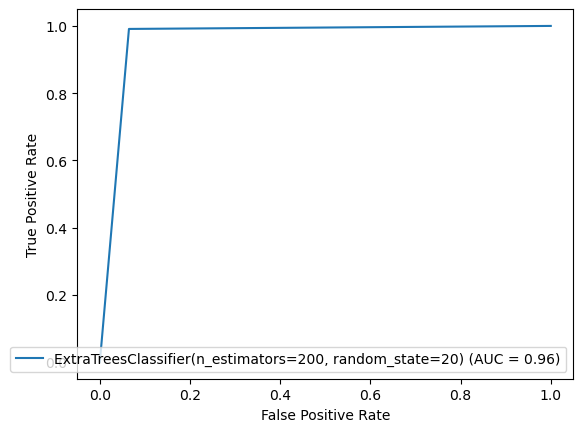

In [132]:
from sklearn import metrics
fpr,tpr,thresholds=metrics.roc_curve(y_test,finalpred)
roc_auc=metrics.auc(fpr,tpr)
display=metrics.RocCurveDisplay(fpr=fpr,tpr=tpr,roc_auc=roc_auc,estimator_name=Final_model)
display.plot()

Here we have plotted the ROC curvefor the final modeland the AUC value for the best model is 96%

SAVING THE MODEL

In [133]:
import joblib
joblib.dump(Final_model,'Bank_Marketing.pkl')

['Bank_Marketing.pkl']

PREDICTING THE SAVED MODEL

In [134]:
#Lets load the saved model and get predictions
model=joblib.load("Bank_Marketing.pkl")

#prediction
prediction=model.predict(x_test)

In [135]:
a=np.array(y_test)
df=pd.DataFrame()
df["Predicted"]=prediction
df["Original"]=a
df

Predicted  Original
0            1.0       1.0
1            1.0       1.0
2            1.0       1.0
3            1.0       1.0
4            1.0       0.0
...          ...       ...
15154        1.0       1.0
15155        0.0       0.0
15156        1.0       1.0
15157        0.0       0.0
15158        0.0       0.0

[15159 rows x 2 columns]

# TEST FILE

In [136]:
df_test=pd.read_csv("https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Bank%20Marketing/termdeposit_test.csv")

In [137]:
df_test

ID  age            job   marital  education default  balance  \
0      38441   32       services   married  secondary      no      118   
1      40403   78        retired  divorced    primary      no     2787   
2       3709   31  self-employed    single   tertiary      no      144   
3      37422   57       services    single    primary      no     3777   
4      12527   45    blue-collar  divorced  secondary      no     -705   
...      ...  ...            ...       ...        ...     ...      ...   
13559  23465   39     management   married   tertiary      no       45   
13560  11743   54    blue-collar   married    primary      no     2281   
13561  28292   35        retired   married    primary      no      285   
13562  45163   29         admin.    single  secondary      no      464   
13563  34839   29         admin.   married  secondary      no        2   

      housing loan    contact  day month  duration  campaign  pdays  previous  \
0         yes   no   cellular   15   may        20         6     -1         0   
1          no   no  telephone    1   jul       372         1     -1         0   
2         yes   no    unknown   16   may       676         1     -1         0   
3         yes   no  telephone   13   may        65         2     -1         0   
4          no  yes    unknown    3   jul       111         1     -1         0   
...       ...  ...        ...  ...   ...       ...       ...    ...       ...   
13559      no   no   cellular   28   aug       148         4     -1         0   
13560     yes   no    unknown   20   jun       158         1     -1         0   
13561     yes   no   cellular   29   jan       136         1     -1         0   
13562      no   no   cellular    9   nov       208         2     91         3   
13563     yes   no   cellular    6   may       339         1    362         1   

      poutcome  
0      unknown  
1      unknown  
2      unknown  
3      unknown  
4      unknown  
...        ...  
13559  unknown  
13560  unknown  
13561  unknown  
13562  success  
13563  failure  

[13564 rows x 17 columns]

In [141]:
df_test.shape

(13564, 17)

In [142]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13564 entries, 0 to 13563
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         13564 non-null  int64 
 1   age        13564 non-null  int64 
 2   job        13564 non-null  object
 3   marital    13564 non-null  object
 4   education  13564 non-null  object
 5   default    13564 non-null  object
 6   balance    13564 non-null  int64 
 7   housing    13564 non-null  object
 8   loan       13564 non-null  object
 9   contact    13564 non-null  object
 10  day        13564 non-null  int64 
 11  month      13564 non-null  object
 12  duration   13564 non-null  int64 
 13  campaign   13564 non-null  int64 
 14  pdays      13564 non-null  int64 
 15  previous   13564 non-null  int64 
 16  poutcome   13564 non-null  object
dtypes: int64(8), object(9)
memory usage: 1.8+ MB


In [143]:
df_test.isnull().sum()

ID           0
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
dtype: int64

there are no null values in the test file

<Axes: >

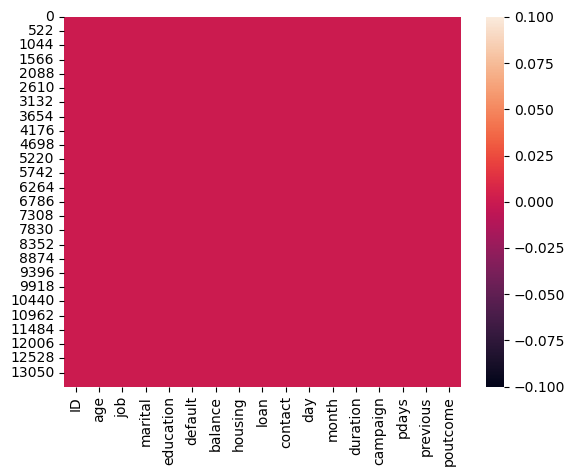

In [145]:
sns.heatmap(df_test.isnull())

In [146]:
df_test.columns.tolist()

['ID',
 'age',
 'job',
 'marital',
 'education',
 'default',
 'balance',
 'housing',
 'loan',
 'contact',
 'day',
 'month',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'poutcome']

In [147]:
df_test.nunique()

ID           13564
age             75
job             12
marital          3
education        4
default          2
balance       4292
housing          2
loan             2
contact          3
day             31
month           12
duration      1201
campaign        40
pdays          422
previous        33
poutcome         4
dtype: int64

In [148]:
df_test.describe

<bound method NDFrame.describe of           ID  age            job   marital  education default  balance  \
0      38441   32       services   married  secondary      no      118   
1      40403   78        retired  divorced    primary      no     2787   
2       3709   31  self-employed    single   tertiary      no      144   
3      37422   57       services    single    primary      no     3777   
4      12527   45    blue-collar  divorced  secondary      no     -705   
...      ...  ...            ...       ...        ...     ...      ...   
13559  23465   39     management   married   tertiary      no       45   
13560  11743   54    blue-collar   married    primary      no     2281   
13561  28292   35        retired   married    primary      no      285   
13562  45163   29         admin.    single  secondary      no      464   
13563  34839   29         admin.   married  secondary      no        2   

      housing loan    contact  day month  duration  campaign  pdays  previous

In [149]:
df_test.describe()

ID           age       balance           day      duration  \
count  13564.000000  13564.000000  13564.000000  13564.000000  13564.000000   
mean   22704.057726     40.887128   1358.496535     15.738646    258.278679   
std    12994.043329     10.604108   3082.940623      8.288174    258.488648   
min        1.000000     18.000000  -3313.000000      1.000000      0.000000   
25%    11546.000000     33.000000     71.000000      8.000000    102.000000   
50%    22782.000000     39.000000    445.000000     16.000000    180.000000   
75%    33974.250000     48.000000   1413.250000     21.000000    319.000000   
max    45206.000000     95.000000  98417.000000     31.000000   3253.000000   

           campaign         pdays      previous  
count  13564.000000  13564.000000  13564.000000  
mean       2.759510     41.648555      0.594441  
std        3.060928    101.985178      1.998193  
min        1.000000     -1.000000      0.000000  
25%        1.000000     -1.000000      0.000000  
50%        2.000000     -1.000000      0.000000  
75%        3.000000     -1.000000      0.000000  
max       58.000000    850.000000     55.000000

Here we can see that the count in each column is 13564 which indicates there is no null value. mean is greater than median in age, balance,duration,campaign,pdays,previous
median is greater than mean in day.
max value in balance, duration,pdays and previous is way higher than the 75th percentile which indicate sthe presence of outliers

In [150]:
#Separating numerical and catagorical columns:
#Checking for catagorical column:
categorical_t=[]
numerical_t=[]
for i in df_test.dtypes.index:
    if df_test.dtypes[i]=="object":
        categorical_t.append(i)
    else:
        numerical_t.append(i)
print("Categorical Columns :",categorical_t)
print("Numerical Columns :",numerical_t)
        

Categorical Columns : ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']
Numerical Columns : ['ID', 'age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']


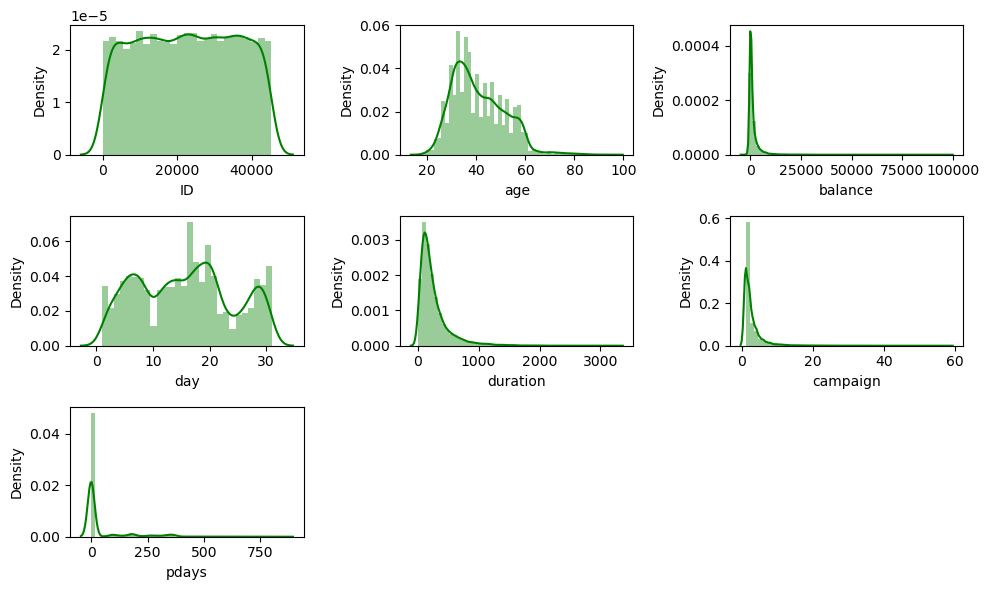

In [151]:
plt.figure(figsize=(10,6))
plotnumber=1
for col in numerical_t:
    if plotnumber<=7:
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(df_test[col],color='g')
    plotnumber+=1
plt.tight_layout()    

Above we can see the presence of right skewness in age, duration, previous,pday,campaign and balance. Day is little left skewed

job
blue-collar      2890
management       2819
technician       2290
admin.           1540
services         1251
retired           690
entrepreneur      479
self-employed     456
unemployed        398
housemaid         366
student           303
unknown            82
dtype: int64

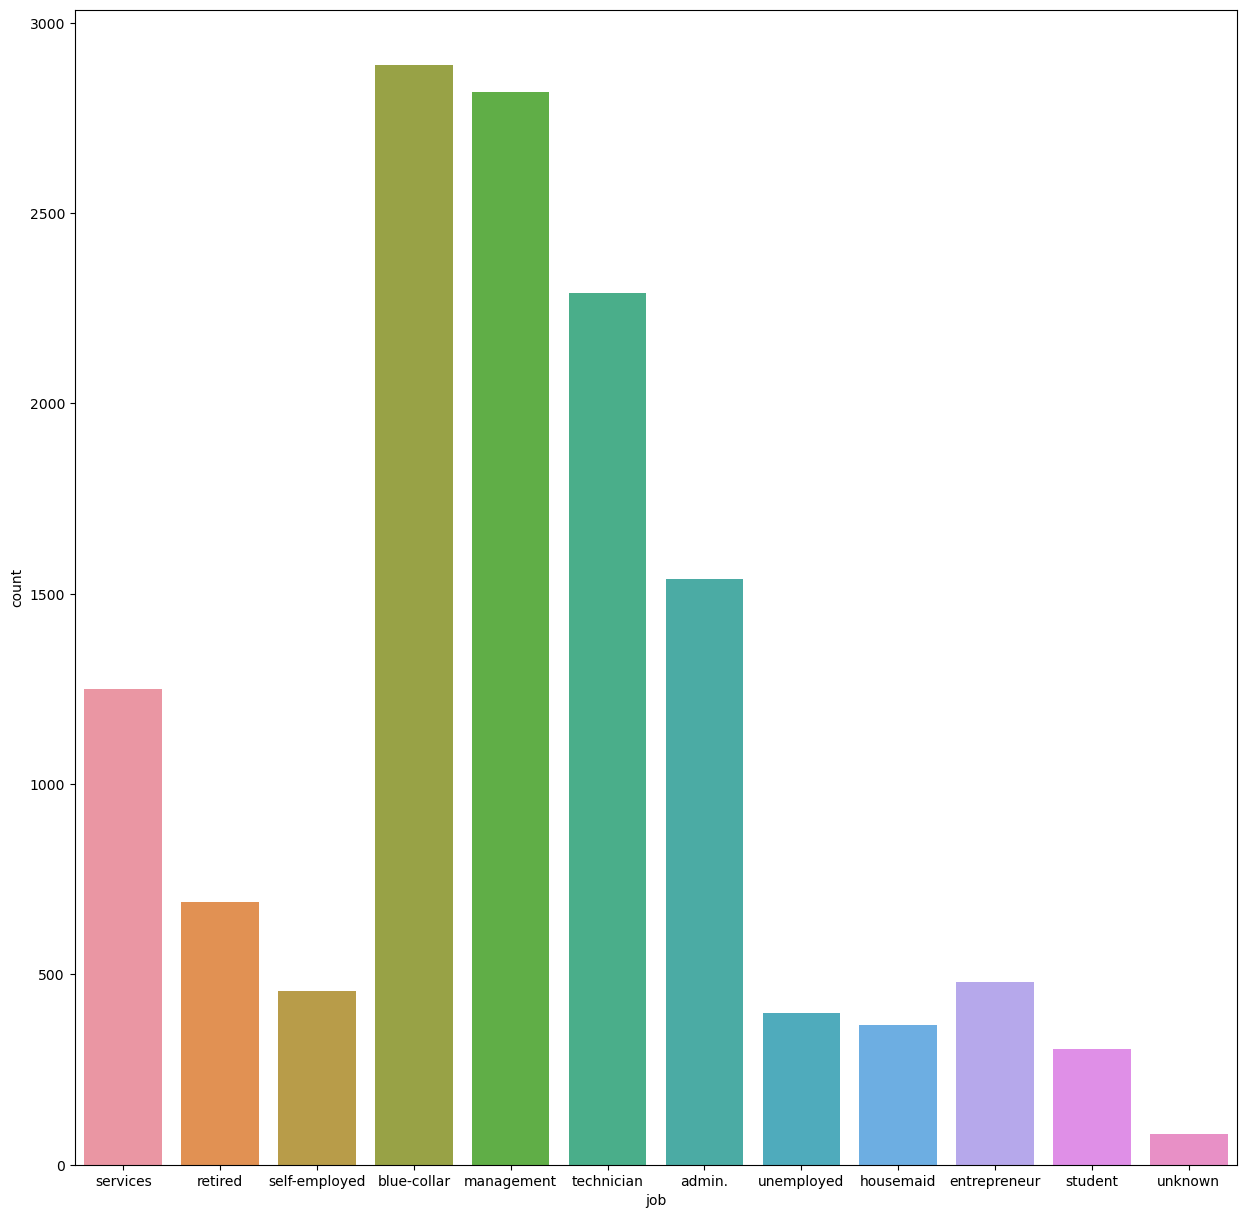

In [152]:
plt.figure(figsize=(15,15))
sns.countplot(x='job',data=df_test)
df_test.value_counts('job')

Above we can see that the highest number is of blue collared people in the database followed by management people

marital
married     8119
single      3868
divorced    1577
dtype: int64

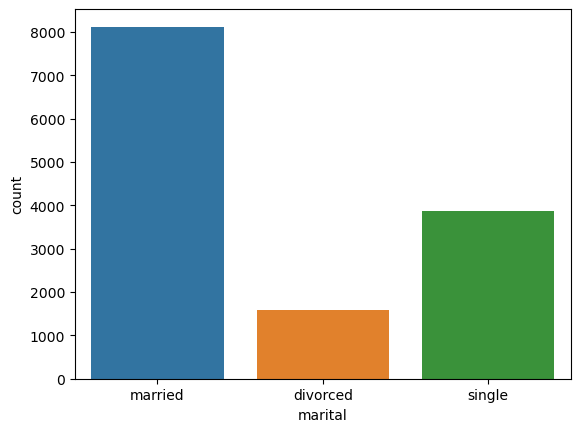

In [153]:
sns.countplot(x='marital',data=df_test)
df_test.value_counts('marital')

The dataset inclued maximum married people followed by unmarried people and least number are of divorcees

education
secondary    6978
tertiary     4000
primary      2043
unknown       543
dtype: int64

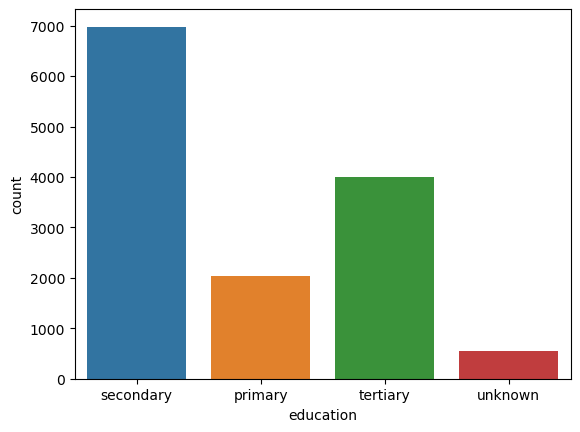

In [155]:
sns.countplot(x='education',data=df_test)
df_test.value_counts('education')

the dataset includes maximum number of people whi have atleast completed their secondary education.

default
no     13334
yes      230
dtype: int64

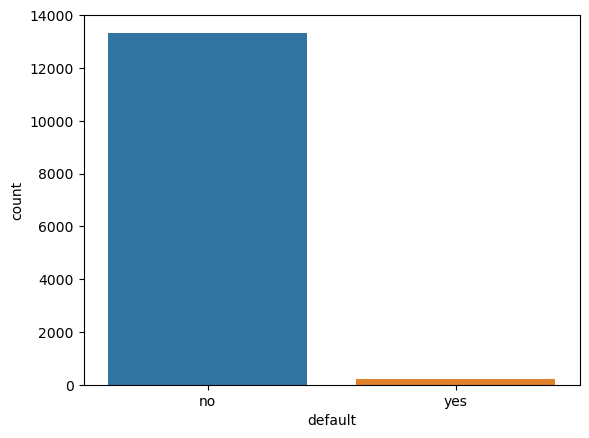

In [156]:
sns.countplot(x='default',data=df_test)
df_test.value_counts('default')

The dataset consists of meximum number of people who do not have credit default

housing
yes    7546
no     6018
dtype: int64

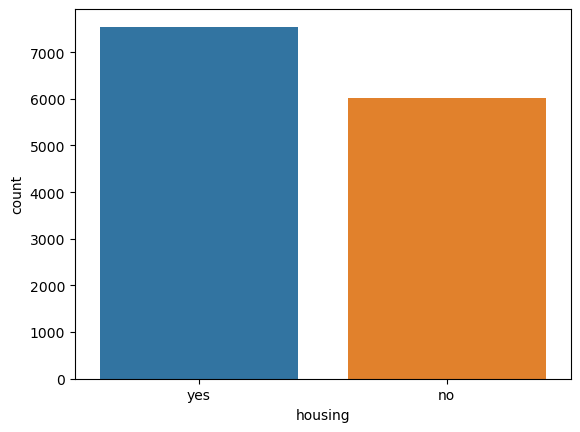

In [157]:
sns.countplot(x='housing',data=df_test)
df_test.value_counts('housing')

The dataset consists of more people who have taken housing loan than those who have not. Though the difference in the no. is not very large

loan
no     11451
yes     2113
dtype: int64

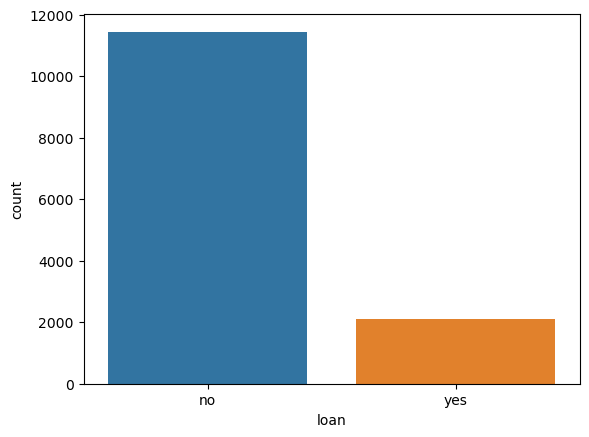

In [158]:
sns.countplot(x='loan',data=df_test)
df_test.value_counts('loan')

The dataset consists of majority of people who have not taken any kind of personal loan

contact
cellular     8862
unknown      3843
telephone     859
dtype: int64

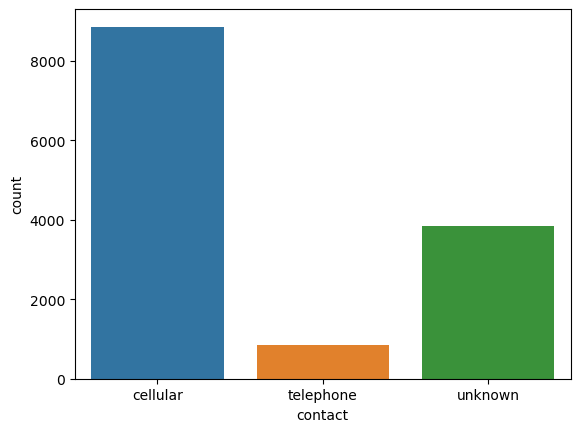

In [159]:
sns.countplot(x='contact',data=df_test)
df_test.value_counts('contact')

The dataset majorly consists of people who have cellphone as it gets easier to communicate with such people

day
20    843
18    696
17    595
6     584
21    581
7     577
14    565
8     561
28    554
5     537
19    529
29    504
15    495
12    487
13    486
30    484
11    465
9     464
16    434
4     429
2     393
3     318
27    317
23    282
26    274
22    265
25    254
31    183
10    164
24    142
1     102
dtype: int64

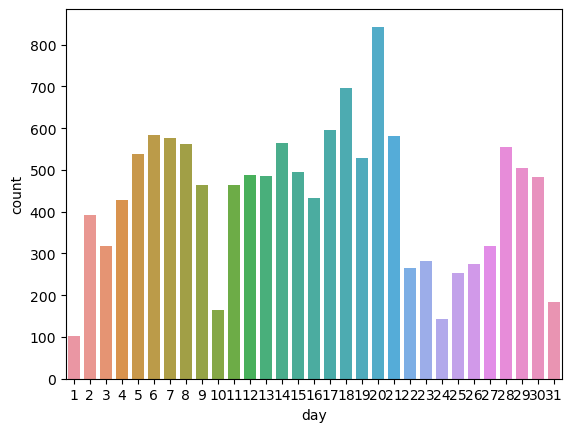

In [160]:
sns.countplot(x='day',data=df_test)
df_test.value_counts('day')

Here we can see that highest no. of contacts have happened on the 20th of the month. and the least number of contact has been made on the 1st of the month

month
may    4097
jul    2051
aug    1914
jun    1603
nov    1187
apr     877
feb     822
jan     426
oct     226
sep     169
mar     135
dec      57
dtype: int64

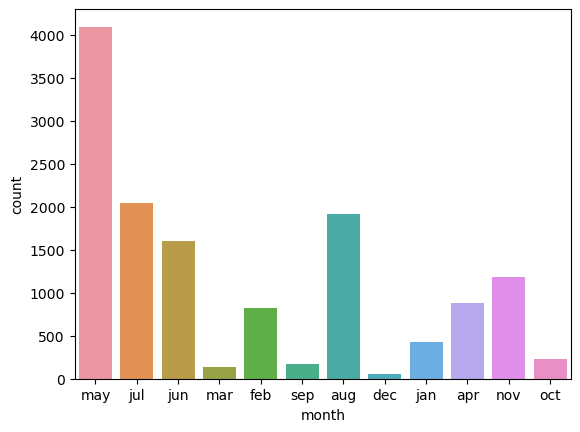

In [161]:
sns.countplot(x='month',data=df_test)
df_test.value_counts('month')

Above graph indicates that the max number of contacts have been made during the month of may followed by july, august and june. Least number of contact have been made in the month of December followe dby march and september

previous
0     11030
1       851
2       625
3       362
4       213
5       148
6        89
7        67
8        48
9        28
11       19
10       18
12       14
13        8
15        5
16        5
14        5
17        4
19        3
20        3
24        3
22        2
23        2
29        2
30        2
38        1
51        1
40        1
27        1
37        1
28        1
18        1
55        1
dtype: int64

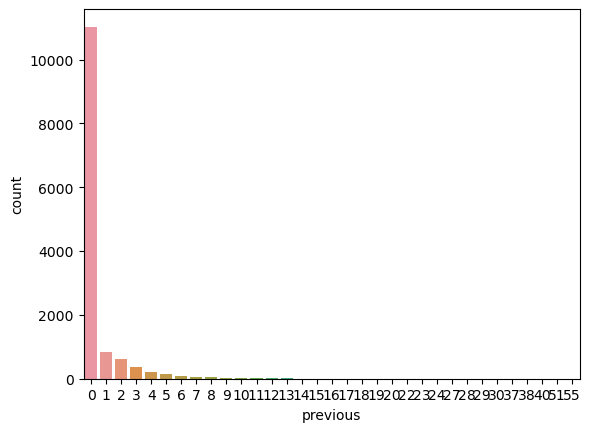

In [162]:
sns.countplot(x='previous',data=df_test)
df_test.value_counts('previous')

Above graph indicates that majority of people in the dataset have not been contacted before the campaign

poutcome
unknown    11030
failure     1539
other        552
success      443
dtype: int64

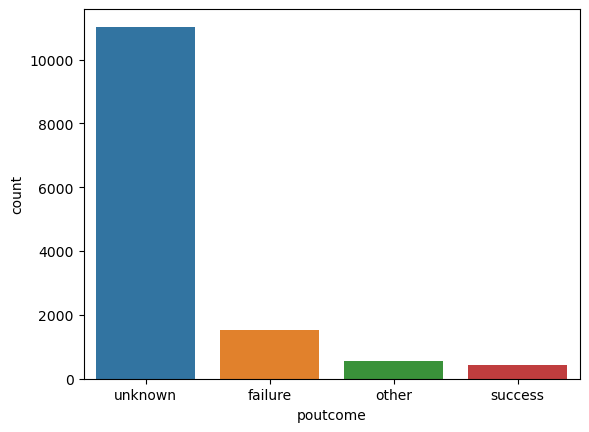

In [163]:
sns.countplot(x='poutcome',data=df_test)
df_test.value_counts('poutcome')

Above graph shows that the outcome of the previous campaign is majorly unknown.

ID             Axes(0.125,0.653529;0.227941x0.226471)
age         Axes(0.398529,0.653529;0.227941x0.226471)
balance     Axes(0.672059,0.653529;0.227941x0.226471)
day            Axes(0.125,0.381765;0.227941x0.226471)
duration    Axes(0.398529,0.381765;0.227941x0.226471)
campaign    Axes(0.672059,0.381765;0.227941x0.226471)
pdays              Axes(0.125,0.11;0.227941x0.226471)
previous        Axes(0.398529,0.11;0.227941x0.226471)
dtype: object

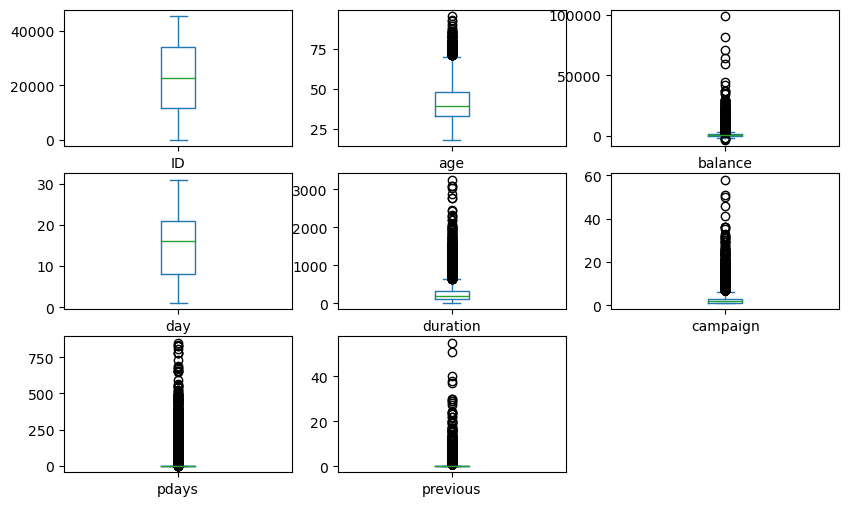

In [165]:
df_test.plot(kind='box',subplots=True,layout=(3,3),figsize=(10,6))

In [ ]:
Above box plot shows the presence of outliers in all the numerical columns except day

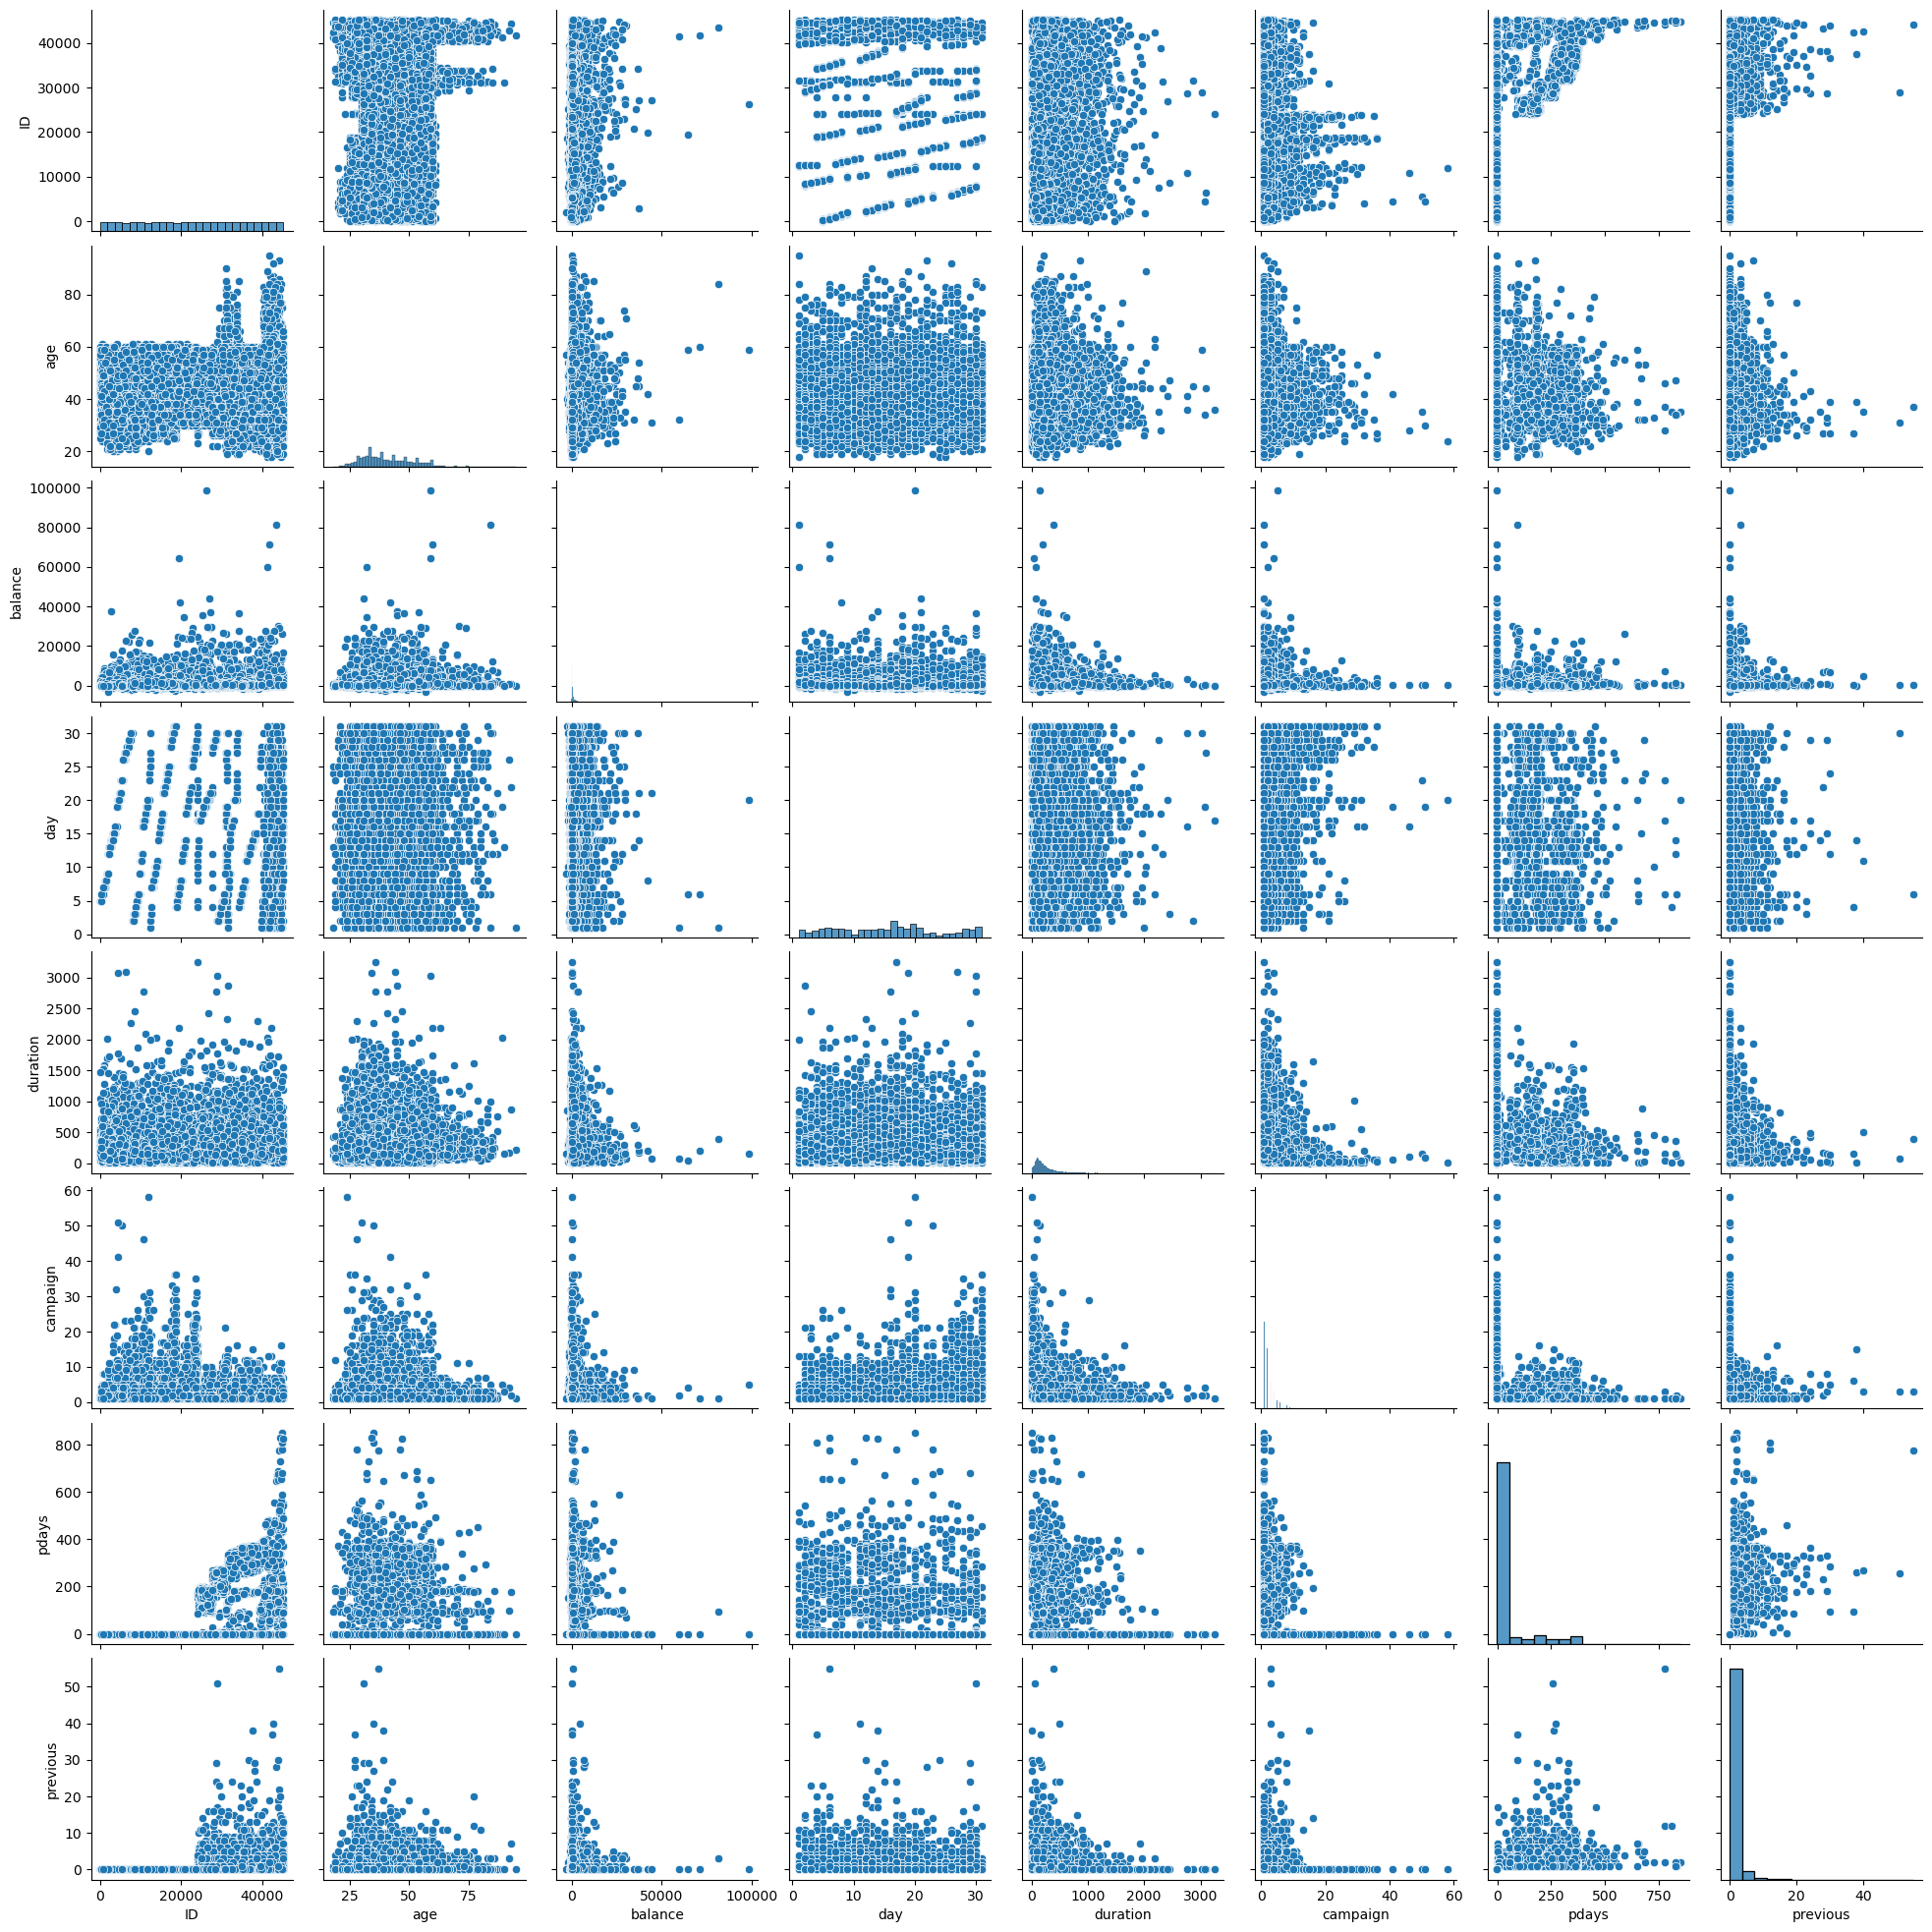

In [167]:
sns.pairplot(df_test)

Above pair plot shows correlation between all the numerical columns

In [168]:
dftestcor=df_test.corr()
dftestcor

ID       age   balance       day  duration  campaign  \
ID        1.000000  0.018874  0.086916 -0.056813  0.026686 -0.101389   
age       0.018874  1.000000  0.085246 -0.004622 -0.006456  0.002439   
balance   0.086916  0.085246  1.000000  0.006890  0.015375 -0.020524   
day      -0.056813 -0.004622  0.006890  1.000000 -0.025344  0.170421   
duration  0.026686 -0.006456  0.015375 -0.025344  1.000000 -0.094653   
campaign -0.101389  0.002439 -0.020524  0.170421 -0.094653  1.000000   
pdays     0.441437 -0.027797  0.007136 -0.105314 -0.006308 -0.091116   
previous  0.321845 -0.011326  0.024824 -0.060719 -0.000415 -0.032366   

             pdays  previous  
ID        0.441437  0.321845  
age      -0.027797 -0.011326  
balance   0.007136  0.024824  
day      -0.105314 -0.060719  
duration -0.006308 -0.000415  
campaign -0.091116 -0.032366  
pdays     1.000000  0.534085  
previous  0.534085  1.000000

Above heatmap shows the correlation between various columns.
1.) pdays and previous are positively correlated with each other
2.)Others are not very much positively or negatively correlated to each other

In [169]:
#Now lets remove outliers
from scipy.stats import zscore

In [170]:
z1=np.abs(zscore(df_test[['age','balance','duration','campaign','pdays','previous']]))
z1

age   balance  duration  campaign     pdays  previous
0      0.838114  0.402389  0.921849  1.058702  0.418199  0.297500
1      3.499987  0.463375  0.439963  0.574850  0.418199  0.297500
2      0.932421  0.393955  1.616074  0.574850  0.418199  0.297500
3      1.519549  0.784508  0.747754  0.248140  0.418199  0.297500
4      0.387871  0.669352  0.569789  0.574850  0.418199  0.297500
...         ...       ...       ...       ...       ...       ...
13559  0.177969  0.426069  0.426644  0.405281  0.418199  0.297500
13560  1.236630  0.299239  0.387957  0.574850  0.418199  0.297500
13561  0.555195  0.348218  0.473070  0.574850  0.418199  0.297500
13562  1.121034  0.290155  0.194517  0.248140  0.483926  1.203911
13563  1.121034  0.440017  0.312293  0.574850  3.141273  0.202970

[13564 rows x 6 columns]

In [171]:
np.where(z1>3)

(array([    1,     9,    14, ..., 13550, 13555, 13563], dtype=int64),
 array([0, 4, 1, ..., 2, 3, 4], dtype=int64))

In [172]:
df1test=df_test[(z1<3).all(axis=1)]
df1test

ID  age            job   marital  education default  balance  \
0      38441   32       services   married  secondary      no      118   
2       3709   31  self-employed    single   tertiary      no      144   
3      37422   57       services    single    primary      no     3777   
4      12527   45    blue-collar  divorced  secondary      no     -705   
5      16013   32     management    single   tertiary      no        0   
...      ...  ...            ...       ...        ...     ...      ...   
13558  35237   32     technician    single  secondary      no      129   
13559  23465   39     management   married   tertiary      no       45   
13560  11743   54    blue-collar   married    primary      no     2281   
13561  28292   35        retired   married    primary      no      285   
13562  45163   29         admin.    single  secondary      no      464   

      housing loan    contact  day month  duration  campaign  pdays  previous  \
0         yes   no   cellular   15   may        20         6     -1         0   
2         yes   no    unknown   16   may       676         1     -1         0   
3         yes   no  telephone   13   may        65         2     -1         0   
4          no  yes    unknown    3   jul       111         1     -1         0   
5         yes   no   cellular   22   jul       455         2     -1         0   
...       ...  ...        ...  ...   ...       ...       ...    ...       ...   
13558     yes   no   cellular    7   may       213         1     -1         0   
13559      no   no   cellular   28   aug       148         4     -1         0   
13560     yes   no    unknown   20   jun       158         1     -1         0   
13561     yes   no   cellular   29   jan       136         1     -1         0   
13562      no   no   cellular    9   nov       208         2     91         3   

      poutcome  
0      unknown  
2      unknown  
3      unknown  
4      unknown  
5      unknown  
...        ...  
13558  unknown  
13559  unknown  
13560  unknown  
13561  unknown  
13562  success  

[12034 rows x 17 columns]

In [173]:
print("data_loss% =",((df_test.shape[0]-df1test.shape[0])/df_test.shape[0])*100)

data_loss% = 11.279858448835151


In [174]:
df1test.skew()

ID          0.061154
age         0.435270
balance     2.476671
day         0.100926
duration    1.578135
campaign    1.958366
pdays       2.728161
previous    3.398894
dtype: float64

In [175]:
df1test['balance']=np.cbrt(df1test['balance'])

In [176]:
df1test['duration']=np.cbrt(df1test['duration'])

In [177]:
df1test['campaign']=np.cbrt(df1test['campaign'])

In [184]:
df1test['previous']=np.cbrt(df1test['previous'])

In [185]:
df1test.skew()

ID          0.061154
age         0.435270
balance    -0.412190
day         0.100926
duration    0.290029
campaign    0.961277
pdays       2.728161
previous    2.002718
dtype: float64

In [186]:
#Now we will Encode the categorical data
from sklearn.preprocessing import OrdinalEncoder
OE=OrdinalEncoder()
for i in df1test.columns:
    if df1test[i].dtype=='object':
        df1test[i]=OE.fit_transform(df1test[i].values.reshape(-1,1))

df1test

ID  age  job  marital  education  default    balance  housing  loan  \
0      38441   32  7.0      1.0        1.0      0.0   4.904868      1.0   0.0   
2       3709   31  6.0      2.0        2.0      0.0   5.241483      1.0   0.0   
3      37422   57  7.0      2.0        0.0      0.0  15.573360      1.0   0.0   
4      12527   45  1.0      0.0        1.0      0.0  -8.900130      0.0   1.0   
5      16013   32  4.0      2.0        2.0      0.0   0.000000      1.0   0.0   
...      ...  ...  ...      ...        ...      ...        ...      ...   ...   
13558  35237   32  9.0      2.0        1.0      0.0   5.052774      1.0   0.0   
13559  23465   39  4.0      1.0        2.0      0.0   3.556893      0.0   0.0   
13560  11743   54  1.0      1.0        0.0      0.0  13.163613      1.0   0.0   
13561  28292   35  5.0      1.0        0.0      0.0   6.580844      1.0   0.0   
13562  45163   29  0.0      2.0        1.0      0.0   7.741753      0.0   0.0   

       contact  day  month  duration  campaign  pdays  previous  poutcome  
0          0.0   15    8.0  2.714418  1.817121     -1  0.000000       3.0  
2          2.0   16    8.0  8.776383  1.000000     -1  0.000000       3.0  
3          1.0   13    8.0  4.020726  1.259921     -1  0.000000       3.0  
4          2.0    3    5.0  4.805896  1.000000     -1  0.000000       3.0  
5          0.0   22    5.0  7.691372  1.259921     -1  0.000000       3.0  
...        ...  ...    ...       ...       ...    ...       ...       ...  
13558      0.0    7    8.0  5.972093  1.000000     -1  0.000000       3.0  
13559      0.0   28    1.0  5.289572  1.587401     -1  0.000000       3.0  
13560      2.0   20    6.0  5.406120  1.000000     -1  0.000000       3.0  
13561      0.0   29    4.0  5.142563  1.000000     -1  0.000000       3.0  
13562      0.0    9    9.0  5.924992  1.259921     91  1.013656       2.0  

[12034 rows x 17 columns]

In [187]:
dftestcorr=df1test.corr()
dftestcorr

ID       age       job   marital  education   default  \
ID         1.000000 -0.020564  0.072125  0.076723   0.099310 -0.056517   
age       -0.020564  1.000000 -0.024909 -0.401340  -0.114052 -0.022287   
job        0.072125 -0.024909  1.000000  0.047944   0.153302 -0.014423   
marital    0.076723 -0.401340  0.047944  1.000000   0.110662  0.001582   
education  0.099310 -0.114052  0.153302  0.110662   1.000000 -0.020514   
default   -0.056517 -0.022287 -0.014423  0.001582  -0.020514  1.000000   
balance    0.133525  0.093053  0.021014  0.028479   0.051363 -0.193733   
housing   -0.184032 -0.170647 -0.122754 -0.014701  -0.081490  0.007690   
loan      -0.071400 -0.004693 -0.022032 -0.060814  -0.057723  0.063530   
contact   -0.732356  0.026597 -0.092125 -0.038729  -0.113206  0.021775   
day       -0.040088 -0.010947  0.021011  0.004194   0.033944  0.005107   
month     -0.200192 -0.051793 -0.097487 -0.016489  -0.058690  0.033134   
duration   0.020356 -0.019316  0.008474  0.004205  -0.004374 -0.005381   
campaign  -0.102281  0.040476  0.021149 -0.026306   0.010517  0.016811   
pdays      0.385242 -0.016494 -0.009335  0.012744   0.009877 -0.032930   
previous   0.441803  0.001452  0.007242  0.015329   0.037932 -0.037677   
poutcome  -0.393769  0.004149  0.002941 -0.009290  -0.028494  0.033629   

            balance   housing      loan   contact       day     month  \
ID         0.133525 -0.184032 -0.071400 -0.732356 -0.040088 -0.200192   
age        0.093053 -0.170647 -0.004693  0.026597 -0.010947 -0.051793   
job        0.021014 -0.122754 -0.022032 -0.092125  0.021011 -0.097487   
marital    0.028479 -0.014701 -0.060814 -0.038729  0.004194 -0.016489   
education  0.051363 -0.081490 -0.057723 -0.113206  0.033944 -0.058690   
default   -0.193733  0.007690  0.063530  0.021775  0.005107  0.033134   
balance    1.000000 -0.081891 -0.146584 -0.045071 -0.008483 -0.004216   
housing   -0.081891  1.000000  0.050499  0.189414 -0.021067  0.276915   
loan      -0.146584  0.050499  1.000000 -0.017592  0.001628  0.021297   
contact   -0.045071  0.189414 -0.017592  1.000000 -0.031019  0.385196   
day       -0.008483 -0.021067  0.001628 -0.031019  1.000000  0.000566   
month     -0.004216  0.276915  0.021297  0.385196  0.000566  1.000000   
duration   0.031503  0.007858 -0.013478 -0.053480 -0.026590 -0.005868   
campaign  -0.024192 -0.042159 -0.006442 -0.007071  0.129826 -0.141723   
pdays      0.052525  0.111317 -0.016650 -0.243328 -0.081824 -0.038641   
previous   0.087337  0.054050 -0.030391 -0.269073 -0.077566 -0.010855   
poutcome  -0.074608 -0.087178  0.017237  0.254620  0.071888  0.010500   

           duration  campaign     pdays  previous  poutcome  
ID         0.020356 -0.102281  0.385242  0.441803 -0.393769  
age       -0.019316  0.040476 -0.016494  0.001452  0.004149  
job        0.008474  0.021149 -0.009335  0.007242  0.002941  
marital    0.004205 -0.026306  0.012744  0.015329 -0.009290  
education -0.004374  0.010517  0.009877  0.037932 -0.028494  
default   -0.005381  0.016811 -0.032930 -0.037677  0.033629  
balance    0.031503 -0.024192  0.052525  0.087337 -0.074608  
housing    0.007858 -0.042159  0.111317  0.054050 -0.087178  
loan      -0.013478 -0.006442 -0.016650 -0.030391  0.017237  
contact   -0.053480 -0.007071 -0.243328 -0.269073  0.254620  
day       -0.026590  0.129826 -0.081824 -0.077566  0.071888  
month     -0.005868 -0.141723 -0.038641 -0.010855  0.010500  
duration   1.000000 -0.112208  0.025428  0.029143 -0.005923  
campaign  -0.112208  1.000000 -0.104069 -0.122230  0.116065  
pdays      0.025428 -0.104069  1.000000  0.898429 -0.882654  
previous   0.029143 -0.122230  0.898429  1.000000 -0.942908  
poutcome  -0.005923  0.116065 -0.882654 -0.942908  1.000000

<Axes: >

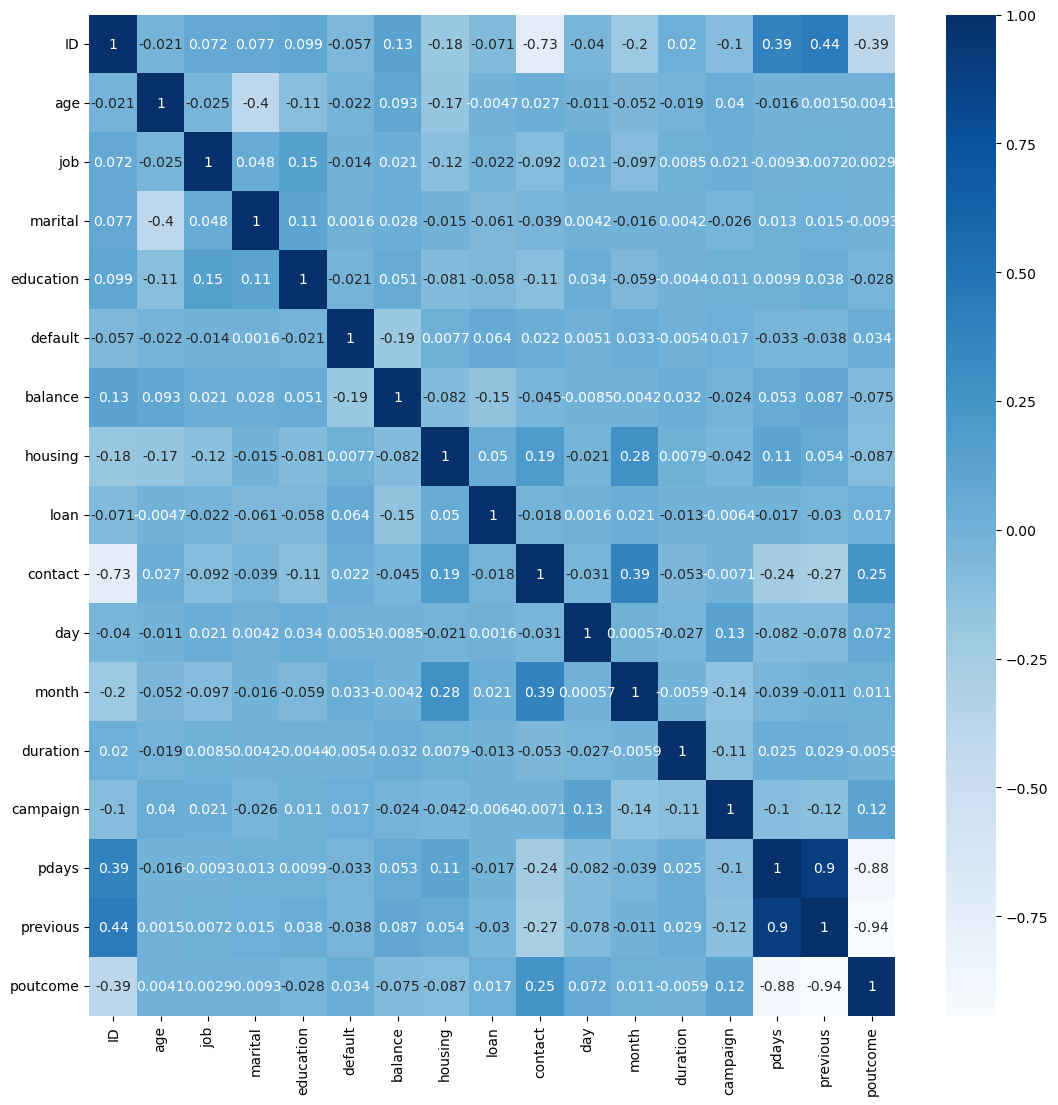

In [188]:
plt.figure(figsize=(13,13))
sns.heatmap(dftestcorr,annot=True,cmap="Blues")

In [189]:
df1test.dtypes

ID             int64
age            int64
job          float64
marital      float64
education    float64
default      float64
balance      float64
housing      float64
loan         float64
contact      float64
day            int64
month        float64
duration     float64
campaign     float64
pdays          int64
previous     float64
poutcome     float64
dtype: object

In [191]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
df1test=pd.DataFrame(scaler.fit_transform(df1test),columns=df1test.columns)
df1test

ID       age       job   marital  education   default   balance  \
0      1.300446 -0.857298  0.802830 -0.273350  -0.298454 -0.134234 -0.362324   
1     -1.407104 -0.956183  0.498452  1.368116   1.050250 -0.134234 -0.307873   
2      1.221010  1.614839  0.802830  1.368116  -1.647159 -0.134234  1.363415   
3     -0.719693  0.428213 -1.023436 -1.914817  -0.298454 -0.134234 -2.595425   
4     -0.447940 -0.857298 -0.110303  1.368116   1.050250 -0.134234 -1.155737   
...         ...       ...       ...       ...        ...       ...       ...   
12029  1.050677 -0.857298  1.411585  1.368116  -0.298454 -0.134234 -0.338398   
12030  0.132985 -0.165099 -0.110303 -0.273350   1.050250 -0.134234 -0.580373   
12031 -0.780810  1.318182 -1.023436 -0.273350  -1.647159 -0.134234  0.973614   
12032  0.509276 -0.560641  0.194074 -0.273350  -1.647159 -0.134234 -0.091217   
12033  1.824463 -1.153954 -1.327814  1.368116  -0.298454 -0.134234  0.096572   

        housing      loan   contact       day     month  duration  campaign  \
0      0.897827 -0.436241 -0.725087 -0.085446  0.846484 -1.940045  1.840045   
1      0.897827 -0.436241  1.472546  0.035213  0.846484  1.912430 -0.949881   
2      0.897827 -0.436241  0.373729 -0.326763  0.846484 -1.109865 -0.062423   
3     -1.113800  2.292308  1.472546 -1.533350 -0.156594 -0.610877 -0.949881   
4      0.897827 -0.436241 -0.725087  0.759165 -0.156594  1.222888 -0.062423   
...         ...       ...       ...       ...       ...       ...       ...   
12029  0.897827 -0.436241 -0.725087 -1.050715  0.846484  0.130259 -0.949881   
12030 -1.113800 -0.436241 -0.725087  1.483117 -1.494030 -0.303493  1.055705   
12031  0.897827 -0.436241  1.472546  0.517848  0.177765 -0.229425 -0.949881   
12032  0.897827 -0.436241 -0.725087  1.603776 -0.490953 -0.396920 -0.949881   
12033 -1.113800 -0.436241 -0.725087 -0.809398  1.180843  0.100326 -0.062423   

          pdays  previous  poutcome  
0     -0.371972 -0.413878  0.390323  
1     -0.371972 -0.413878  0.390323  
2     -0.371972 -0.413878  0.390323  
3     -0.371972 -0.413878  0.390323  
4     -0.371972 -0.413878  0.390323  
...         ...       ...       ...  
12029 -0.371972 -0.413878  0.390323  
12030 -0.371972 -0.413878  0.390323  
12031 -0.371972 -0.413878  0.390323  
12032 -0.371972 -0.413878  0.390323  
12033  0.828772  2.430209 -0.712552  

[12034 rows x 17 columns]

In [192]:
vif1=pd.DataFrame()
vif1['Features']=df1test.columns
vif1['Values']=[variance_inflation_factor(df1test.values,i) for i in range(len(df1test.columns))]
vif1

Features     Values
0          ID   2.736072
1         age   1.270746
2         job   1.044819
3     marital   1.220627
4   education   1.063680
5     default   1.043647
6     balance   1.098770
7     housing   1.216483
8        loan   1.044146
9     contact   2.599475
10        day   1.031022
11      month   1.309786
12   duration   1.026255
13   campaign   1.080251
14      pdays   5.689444
15   previous  11.851616
16   poutcome   9.791471

Here we can see multicolinearity between previous and poutcome. So we will remove poutcome

In [193]:
df1test.drop('poutcome',axis=1,inplace=True)
df1test

ID       age       job   marital  education   default   balance  \
0      1.300446 -0.857298  0.802830 -0.273350  -0.298454 -0.134234 -0.362324   
1     -1.407104 -0.956183  0.498452  1.368116   1.050250 -0.134234 -0.307873   
2      1.221010  1.614839  0.802830  1.368116  -1.647159 -0.134234  1.363415   
3     -0.719693  0.428213 -1.023436 -1.914817  -0.298454 -0.134234 -2.595425   
4     -0.447940 -0.857298 -0.110303  1.368116   1.050250 -0.134234 -1.155737   
...         ...       ...       ...       ...        ...       ...       ...   
12029  1.050677 -0.857298  1.411585  1.368116  -0.298454 -0.134234 -0.338398   
12030  0.132985 -0.165099 -0.110303 -0.273350   1.050250 -0.134234 -0.580373   
12031 -0.780810  1.318182 -1.023436 -0.273350  -1.647159 -0.134234  0.973614   
12032  0.509276 -0.560641  0.194074 -0.273350  -1.647159 -0.134234 -0.091217   
12033  1.824463 -1.153954 -1.327814  1.368116  -0.298454 -0.134234  0.096572   

        housing      loan   contact       day     month  duration  campaign  \
0      0.897827 -0.436241 -0.725087 -0.085446  0.846484 -1.940045  1.840045   
1      0.897827 -0.436241  1.472546  0.035213  0.846484  1.912430 -0.949881   
2      0.897827 -0.436241  0.373729 -0.326763  0.846484 -1.109865 -0.062423   
3     -1.113800  2.292308  1.472546 -1.533350 -0.156594 -0.610877 -0.949881   
4      0.897827 -0.436241 -0.725087  0.759165 -0.156594  1.222888 -0.062423   
...         ...       ...       ...       ...       ...       ...       ...   
12029  0.897827 -0.436241 -0.725087 -1.050715  0.846484  0.130259 -0.949881   
12030 -1.113800 -0.436241 -0.725087  1.483117 -1.494030 -0.303493  1.055705   
12031  0.897827 -0.436241  1.472546  0.517848  0.177765 -0.229425 -0.949881   
12032  0.897827 -0.436241 -0.725087  1.603776 -0.490953 -0.396920 -0.949881   
12033 -1.113800 -0.436241 -0.725087 -0.809398  1.180843  0.100326 -0.062423   

          pdays  previous  
0     -0.371972 -0.413878  
1     -0.371972 -0.413878  
2     -0.371972 -0.413878  
3     -0.371972 -0.413878  
4     -0.371972 -0.413878  
...         ...       ...  
12029 -0.371972 -0.413878  
12030 -0.371972 -0.413878  
12031 -0.371972 -0.413878  
12032 -0.371972 -0.413878  
12033  0.828772  2.430209  

[12034 rows x 16 columns]

In [194]:
vif1=pd.DataFrame()
vif1['Features']=df1test.columns
vif1['Values']=[variance_inflation_factor(df1test.values,i) for i in range(len(df1test.columns))]
vif1

Features    Values
0          ID  2.709778
1         age  1.270746
2         job  1.044679
3     marital  1.220581
4   education  1.063679
5     default  1.043646
6     balance  1.098604
7     housing  1.211774
8        loan  1.043972
9     contact  2.581552
10        day  1.030995
11      month  1.309687
12   duration  1.020644
13   campaign  1.079689
14      pdays  5.392191
15   previous  5.642029

In [196]:
#Now we will run df1test through our final saved model.
Test=np.array(df1test)
dfx=pd.DataFrame()
dfx["Predicted"]=prediction
dfx

Predicted
0            1.0
1            1.0
2            1.0
3            1.0
4            1.0
...          ...
15154        1.0
15155        0.0
15156        1.0
15157        0.0
15158        0.0

[15159 rows x 1 columns]

In [ ]:
#Finish